In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
sns.set('notebook')

In [3]:
data = pd.read_csv(r"F:\DSA\Projects\delhivery_data.csv")
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
data.shape

(144867, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [6]:
data.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [7]:
data.describe(include = 'all')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867.000000,144867,144867.000000,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,NaN,2,NaN,93180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,NaN,True,NaN,2018-09-24 05:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,NaN,118749,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,961.262986,NaN,232.926567,NaN,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1037.012769,NaN,344.755577,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,9.000000,NaN,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.000000,NaN,22.000000,NaN,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449.000000,NaN,66.000000,NaN,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1634.000000,NaN,286.000000,NaN,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000


In [8]:
data.describe(include='object')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [9]:
data['trip_uuid'].unique()

array(['trip-153741093647649320', 'trip-153768492602129387',
       'trip-153693976643699843', ..., 'trip-153761584139918815',
       'trip-153718412883843340', 'trip-153746066843555182'], dtype=object)

In [10]:
data["trip_creation_time"] = pd.to_datetime(data["trip_creation_time"])
data["od_start_time"] = pd.to_datetime(data["od_start_time"])
data["od_end_time"] = pd.to_datetime(data["od_end_time"])

In [11]:
data["trip_creation_time"].sort_values()

125006   2018-09-12 00:00:16.535741
124997   2018-09-12 00:00:16.535741
124998   2018-09-12 00:00:16.535741
124999   2018-09-12 00:00:16.535741
125000   2018-09-12 00:00:16.535741
                    ...            
86465    2018-10-03 23:59:14.390954
11570    2018-10-03 23:59:42.701692
11573    2018-10-03 23:59:42.701692
11572    2018-10-03 23:59:42.701692
11571    2018-10-03 23:59:42.701692
Name: trip_creation_time, Length: 144867, dtype: datetime64[ns]

In [12]:
data.loc[data.trip_uuid=='trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [13]:
data.loc[data.trip_uuid=='trip-153768492602129387']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
10,training,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,FTL,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,302.0,True,22,2018-09-23 11:05:19,23.194334,38.0,24.0,26.8622,1.583333,38.0,24.0,26.8622,1.583333
11,training,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,FTL,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,302.0,True,44,2018-09-23 10:27:22,44.045659,76.0,41.0,54.4326,1.853659,37.0,27.0,30.1058,1.370370
12,training,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,FTL,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,302.0,True,66,2018-09-23 09:45:25,72.849327,117.0,68.0,89.6680,1.720588,41.0,26.0,35.2353,1.576923
13,training,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,FTL,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,302.0,True,88,2018-09-23 09:21:27,88.076599,141.0,80.0,108.3939,1.762500,23.0,14.0,17.2476,1.642857
14,training,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,FTL,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,302.0,False,100,2018-09-23 08:39:31,100.708423,183.0,95.0,129.3519,1.926316,41.0,15.0,20.9580,2.733333


In [14]:
data.loc[data.trip_uuid=='trip-153693976643699843']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
15,training,2018-09-14 15:42:46.437249,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,trip-153693976643699843,IND400011AAA,LowerParel_CP (Maharashtra),IND400072AAD,Mumbai_Chndivli_PC (Maharashtra),2018-09-14 15:42:46.437249,2018-09-14 17:31:45.368791,108.0,True,9,2018-09-14 16:29:54,9.355852,46.0,11.0,11.4344,4.181818,46.0,11.0,11.4344,4.181818
16,training,2018-09-14 15:42:46.437249,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,trip-153693976643699843,IND400011AAA,LowerParel_CP (Maharashtra),IND400072AAD,Mumbai_Chndivli_PC (Maharashtra),2018-09-14 15:42:46.437249,2018-09-14 17:31:45.368791,108.0,False,16,2018-09-14 16:15:53,16.431273,60.0,16.0,18.7941,3.750000,14.0,5.0,7.3597,2.800000


In [15]:
data.loc[data.trip_uuid=='trip-153761584139918815']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144849,training,2018-09-22 11:30:41.399439,thanos::sroute:d81088e2-9ccd-43e9-9260-3e85633...,FTL,trip-153761584139918815,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-22 11:30:41.399439,2018-09-22 21:45:05.128533,614.0,True,22,2018-09-22 20:19:23,24.160531,56.0,25.0,27.8488,2.240000,56.0,25.0,27.8488,2.240000
144850,training,2018-09-22 11:30:41.399439,thanos::sroute:d81088e2-9ccd-43e9-9260-3e85633...,FTL,trip-153761584139918815,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-22 11:30:41.399439,2018-09-22 21:45:05.128533,614.0,True,44,2018-09-22 19:33:22,44.180630,102.0,42.0,54.8631,2.428571,46.0,26.0,29.5496,1.769231
144851,training,2018-09-22 11:30:41.399439,thanos::sroute:d81088e2-9ccd-43e9-9260-3e85633...,FTL,trip-153761584139918815,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-22 11:30:41.399439,2018-09-22 21:45:05.128533,614.0,True,66,2018-09-22 18:51:21,73.103288,144.0,68.0,89.9517,2.117647,42.0,32.0,34.2140,1.312500
144852,training,2018-09-22 11:30:41.399439,thanos::sroute:d81088e2-9ccd-43e9-9260-3e85633...,FTL,trip-153761584139918815,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-22 11:30:41.399439,2018-09-22 21:45:05.128533,614.0,True,88,2018-09-22 17:57:24,89.220979,198.0,80.0,109.6824,2.475000,53.0,14.0,18.2524,3.785714
144853,training,2018-09-22 11:30:41.399439,thanos::sroute:d81088e2-9ccd-43e9-9260-3e85633...,FTL,trip-153761584139918815,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-22 11:30:41.399439,2018-09-22 21:45:05.128533,614.0,False,100,2018-09-22 16:25:28,100.562078,289.0,95.0,129.1588,3.042105,91.0,14.0,19.4764,6.500000


In [16]:
data["trip_creation_time"] = pd.to_datetime(data["trip_creation_time"])
data["od_start_time"] = pd.to_datetime(data["od_start_time"])
data["od_end_time"] = pd.to_datetime(data["od_end_time"])

In [17]:
data["trip_creation_time"].dt.month_name().value_counts()

trip_creation_time
September    127349
October       17518
Name: count, dtype: int64

In [18]:
data["trip_creation_time"].dt.year.value_counts()

trip_creation_time
2018    144867
Name: count, dtype: int64

In [19]:
data["trip_creation_time"].dt.day_name().value_counts()

trip_creation_time
Wednesday    26732
Thursday     20481
Friday       20242
Tuesday      19961
Saturday     19936
Monday       19645
Sunday       17870
Name: count, dtype: int64

In [20]:
data["source_city"] = data["source_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
data['source_state'] = data['source_name'].str.split(r'\s*\(\s*', n=1, expand=True)[1].str.rstrip(')')
data["destination_city"] = data["destination_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
data["destination_state"] = data["destination_name"].str.split(r'\s*\(\s*', n=1, expand=True)[1].str.rstrip(')')

In [21]:
data["destination_state"].unique()

array(['Gujarat', 'Maharashtra', 'Karnataka', 'Kerala', 'Punjab',
       'Uttarakhand', 'Tamil Nadu', 'Haryana', 'Rajasthan', nan,
       'Telangana', 'Uttar Pradesh', 'Delhi', 'Himachal Pradesh',
       'Andhra Pradesh', 'Bihar', 'Jharkhand', 'Assam', 'Orissa',
       'West Bengal', 'Jammu & Kashmir', 'Madhya Pradesh', 'Chandigarh',
       'Chhattisgarh', 'Goa', 'Pondicherry', 'Arunachal Pradesh',
       'Dadra and Nagar Haveli', 'Meghalaya', 'Tripura', 'Mizoram',
       'Daman & Diu', 'Nagaland'], dtype=object)

In [22]:
state_cut = data[["source_state","destination_state","cutoff_factor","route_type"]]
state_cut[state_cut["source_state"]=="Gujarat"].head(30)

,source_state,destination_state,cutoff_factor,route_type
0,Gujarat,Gujarat,9,Carting
1,Gujarat,Gujarat,18,Carting
2,Gujarat,Gujarat,27,Carting
3,Gujarat,Gujarat,36,Carting
4,Gujarat,Gujarat,39,Carting
5,Gujarat,Gujarat,9,Carting
6,Gujarat,Gujarat,18,Carting
7,Gujarat,Gujarat,27,Carting
8,Gujarat,Gujarat,36,Carting
9,Gujarat,Gujarat,43,Carting


In [23]:
state_cut[state_cut["source_state"]=="Maharashtra"].head(30)

,source_state,destination_state,cutoff_factor,route_type
10,Maharashtra,Maharashtra,22,FTL
11,Maharashtra,Maharashtra,44,FTL
12,Maharashtra,Maharashtra,66,FTL
13,Maharashtra,Maharashtra,88,FTL
14,Maharashtra,Maharashtra,100,FTL
15,Maharashtra,Maharashtra,9,Carting
16,Maharashtra,Maharashtra,16,Carting
200,Maharashtra,Maharashtra,22,FTL
201,Maharashtra,Maharashtra,29,FTL
202,Maharashtra,Maharashtra,22,FTL


In [24]:
data[["route_type","cutoff_factor"]].head(30)

,route_type,cutoff_factor
0,Carting,9
1,Carting,18
2,Carting,27
3,Carting,36
4,Carting,39
5,Carting,9
6,Carting,18
7,Carting,27
8,Carting,36
9,Carting,43


**It is inferred that Delhivery uses 9 Km as cutoff for Carting and 22 km for FTL trips**

In [25]:
data[["route_type","cutoff_factor"]].tail(30)

,route_type,cutoff_factor
144837,FTL,88
144838,FTL,110
144839,FTL,132
144840,FTL,154
144841,FTL,176
144842,FTL,198
144843,FTL,220
144844,FTL,242
144845,FTL,264
144846,FTL,265


In [26]:
num_vars = data.select_dtypes(include=np.number).columns.tolist()

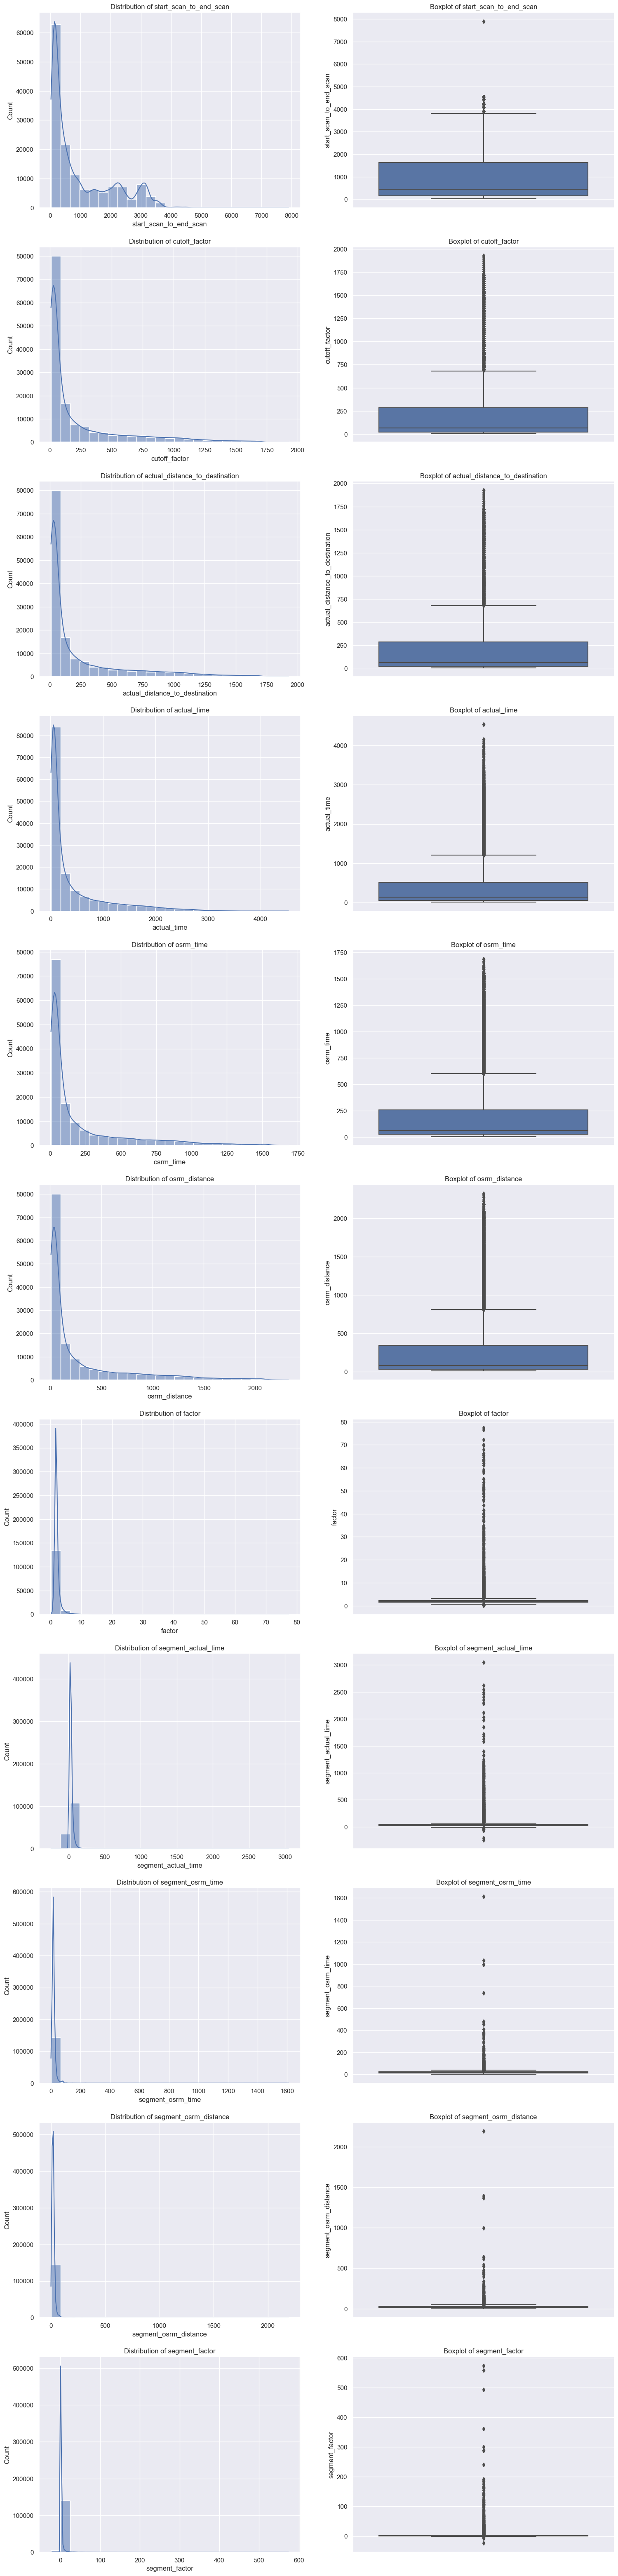

In [27]:
fig, ax = plt.subplots(nrows=11, ncols=2, figsize=(18, 80))

for i in range(len(num_vars)):

    sns.histplot(x=data[num_vars[i]], kde=True, bins = 25, ax=ax[i, 0])
    ax[i, 0].set_title(f"Distribution of {num_vars[i]}")

    sns.boxplot(y = data[num_vars[i]], ax=ax[i, 1], data=data)
    ax[i, 1].set_title(f"Boxplot of {num_vars[i]}")

plt.show()

In [28]:
df = data

In [29]:
df['segment_id'] = df['trip_uuid']+df['source_center']+df['destination_center']
df['segment_actual_time'] = df.groupby('segment_id')['segment_actual_time'].cumsum()
df['segment_osrm_time'] = df.groupby('segment_id')['segment_osrm_time'].cumsum()
df['segment_osrm_distance'] = df.groupby('segment_id')['segment_osrm_distance'].cumsum()

In [30]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'source_city', 'source_state', 'destination_city', 'destination_state',
       'segment_id'],
      dtype='object')

In [31]:
merge_segment = {'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'trip_uuid':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'last',
              'actual_distance_to_destination':'last',
              'actual_time':'last',
              'osrm_time':'last',
              'osrm_distance':'last',
              'segment_actual_time':'last',
              'segment_osrm_time':'last',
              'segment_osrm_distance':'last',
                 'source_city':'first',
                 'source_state':'first',
                 'destination_city':'first',
                 'destination_state':'first'
}

In [32]:
segment_df = df.sort_values(['segment_id','actual_time']).groupby('segment_id').agg(merge_segment).reset_index()
segment_df.head()

,segment_id,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_city,source_state,destination_city,destination_state
0,trip-153671041653548748IND209304AAAIND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,Kanpur,Uttar Pradesh,Gurgaon,Haryana
1,trip-153671041653548748IND462022AAAIND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,Bhopal,Madhya Pradesh,Kanpur,Uttar Pradesh
2,trip-153671042288605164IND561203AABIND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,Doddablpur,Karnataka,Chikblapur,Karnataka
3,trip-153671042288605164IND572101AAAIND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,Tumkur,Karnataka,Doddablpur,Karnataka
4,trip-153671043369099517IND000000ACBIND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,Gurgaon,Haryana,Chandigarh,Punjab


In [33]:
segment_df.shape

(26368, 23)

In [34]:
segment_df.columns

Index(['segment_id', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'source_city',
       'source_state', 'destination_city', 'destination_state'],
      dtype='object')

In [35]:
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_id                      26368 non-null  object        
 1   trip_creation_time              26368 non-null  datetime64[ns]
 2   route_schedule_uuid             26368 non-null  object        
 3   route_type                      26368 non-null  object        
 4   trip_uuid                       26368 non-null  object        
 5   source_center                   26368 non-null  object        
 6   source_name                     26302 non-null  object        
 7   destination_center              26368 non-null  object        
 8   destination_name                26287 non-null  object        
 9   od_start_time                   26368 non-null  datetime64[ns]
 10  od_end_time                     26368 non-null  datetime64[ns]
 11  st

In [36]:
segment_df.loc[segment_df.trip_uuid=='trip-153741093647649320']

,segment_id,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_city,source_state,destination_city,destination_state
10374,trip-153741093647649320IND388121AAAIND388620AAB,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,44.0,49.4772,Anand,Gujarat,Khambhat,Gujarat
10375,trip-153741093647649320IND388620AABIND388320AAA,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,44.0,53.2334,Khambhat,Gujarat,Anand,Gujarat


In [37]:
segment_df.loc[segment_df.trip_uuid=='trip-153761584139918815']

,segment_id,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_city,source_state,destination_city,destination_state
13401,trip-153761584139918815IND421302AAGIND411033AAA,2018-09-22 11:30:41.399439,thanos::sroute:d81088e2-9ccd-43e9-9260-3e85633...,FTL,trip-153761584139918815,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-22 11:30:41.399439,2018-09-22 21:45:05.128533,614.0,100.562078,289.0,95.0,129.1588,288.0,111.0,129.3412,Bhiwandi,Maharashtra,Pune,Maharashtra


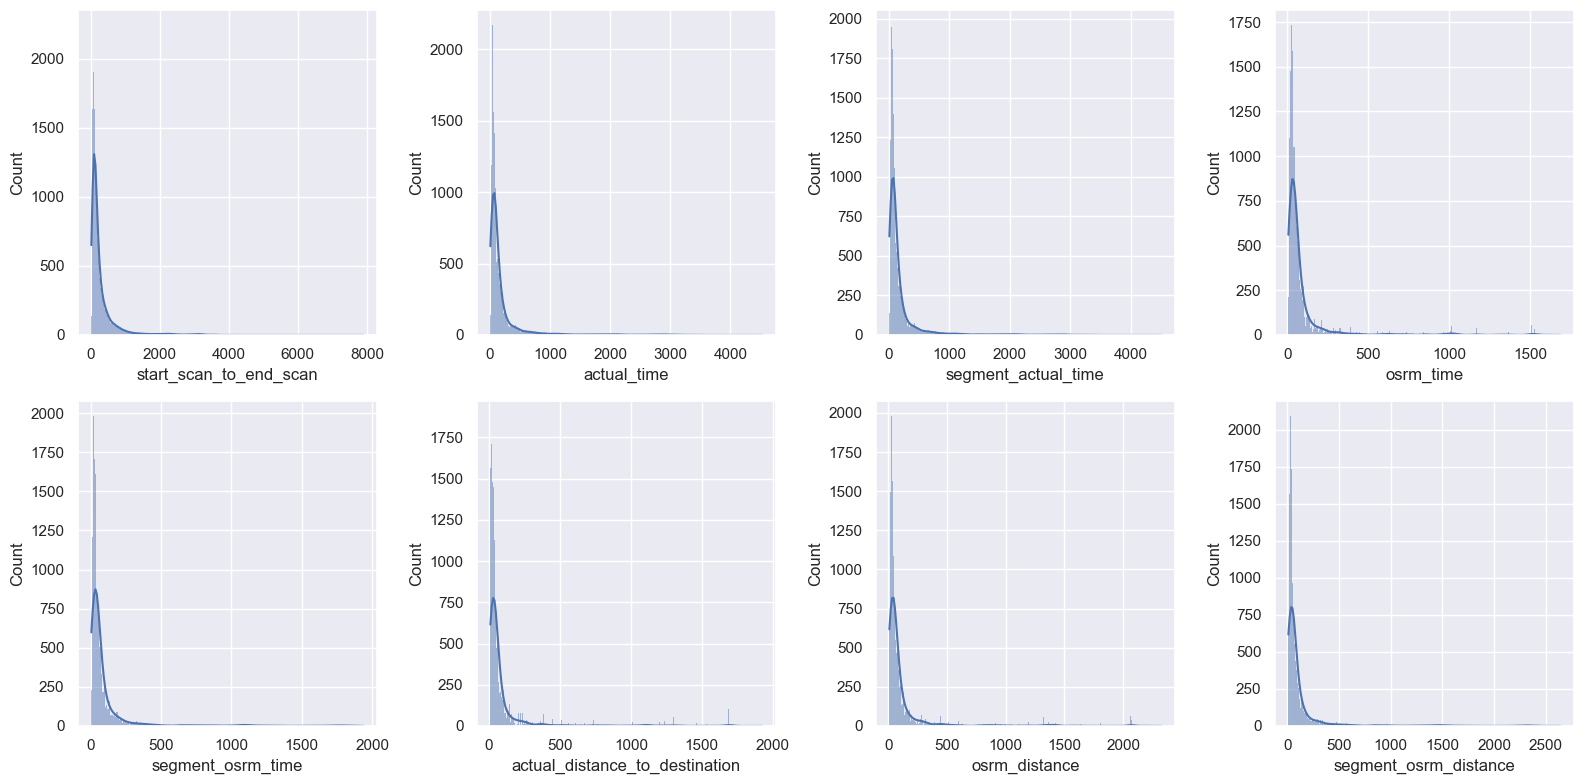

In [38]:
fig, ax = plt.subplots(2,4, figsize=(16,8))

sns.histplot(data=segment_df['start_scan_to_end_scan'], kde=True, ax=ax[0,0])
sns.histplot(data=segment_df['actual_time'], kde=True, ax=ax[0,1])
sns.histplot(data=segment_df['segment_actual_time'], kde=True, ax=ax[0,2])
sns.histplot(data=segment_df['osrm_time'], kde=True, ax=ax[0,3])
sns.histplot(data=segment_df['segment_osrm_time'], kde=True, ax=ax[1,0])
sns.histplot(data=segment_df['actual_distance_to_destination'], kde=True, ax=ax[1,1])
sns.histplot(data=segment_df['osrm_distance'], kde=True, ax=ax[1,2])
sns.histplot(data=segment_df['segment_osrm_distance'], kde=True, ax=ax[1,3])

plt.tight_layout()
plt.show()

In [39]:
inter_segment =  segment_df[segment_df['source_state'] != segment_df['destination_state']]
intra_segment =  segment_df[segment_df['source_state'] == segment_df['destination_state']]

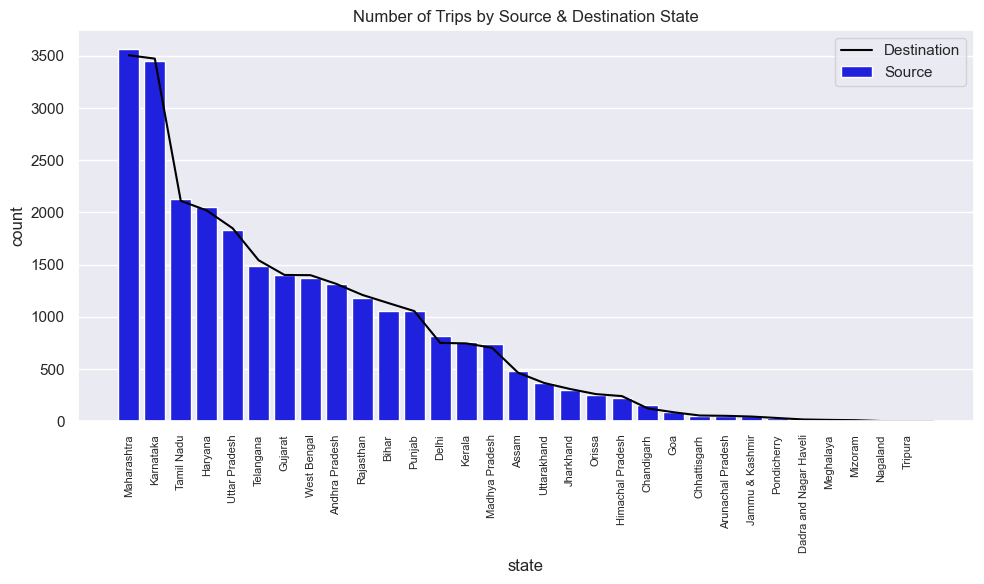

In [40]:
plt.figure(figsize=(10, 6))
source = segment_df['source_state'].value_counts().reset_index()
source.columns = ['state', 'count']
destination = segment_df['destination_state'].value_counts().reset_index()
destination.columns = ['state', 'count']
sns.barplot(data=source, x='state', y='count', label='Source', color = 'blue')
sns.lineplot(data=destination, x='state', y='count', label='Destination', color = 'black')
plt.title('Number of Trips by Source & Destination State')
plt.legend()
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

### Bivariate & Multivariate Analysis

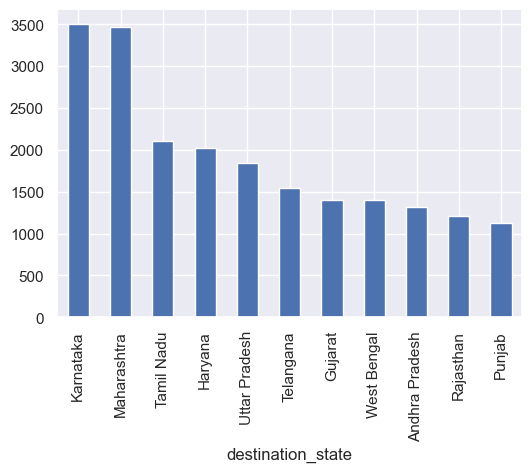

In [41]:
plt.figure(figsize=(6,4))
segment_df.groupby('destination_state')['trip_uuid'].count().sort_values(ascending=False).head(11).plot(kind='bar')
plt.show()

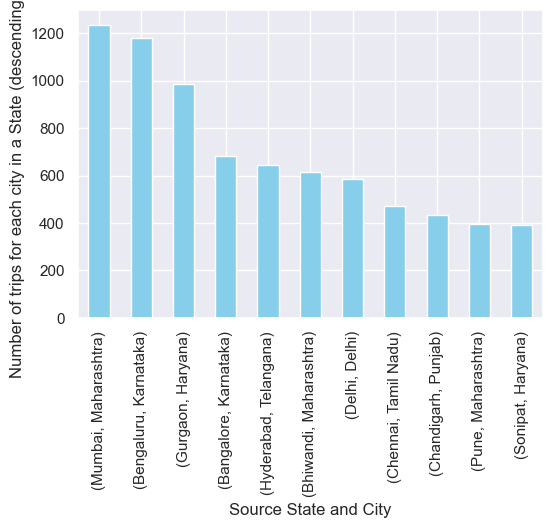

In [42]:
plt.figure(figsize=(6,4))
segment_df.groupby(['destination_city','destination_state'])['trip_uuid'].count().sort_values(ascending=False).head(11).plot(kind='bar', color = 'skyblue')
plt.ylabel('Number of trips for each city in a State (descending order)')
plt.xlabel('Source State and City')
plt.show()

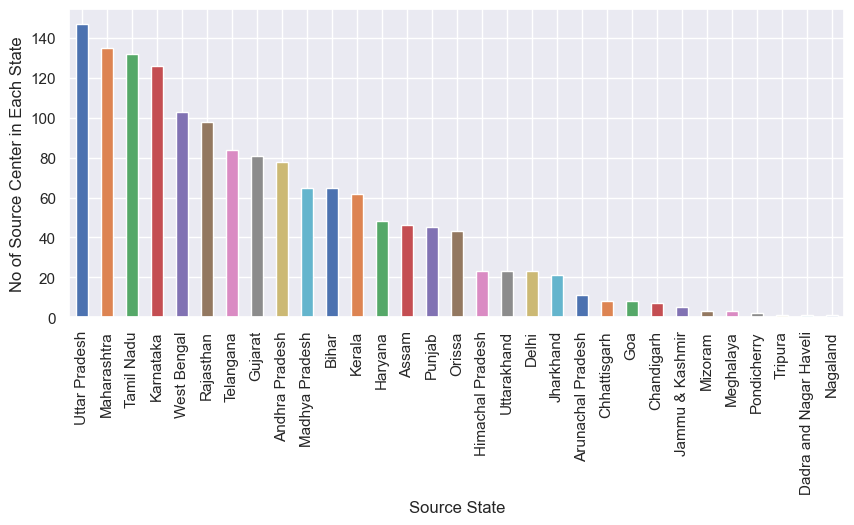

In [43]:
plt.figure(figsize=(10,4))
segment_df.groupby('source_state')['source_center'].nunique().sort_values(ascending=False).plot(kind='bar', color = sns.color_palette())
plt.ylabel('No of Source Center in Each State')
plt.xlabel('Source State')
plt.show()

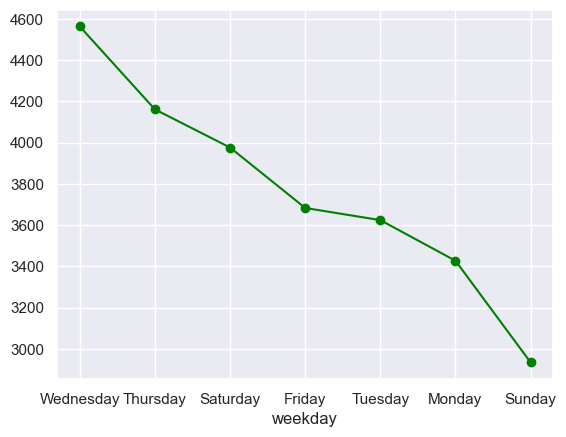

In [44]:
segment_df['weekday'] = segment_df['od_start_time'].dt.day_name()
segment_df['weekday'].value_counts().plot(kind = 'line', color = 'green', marker = 'o')
plt.show()

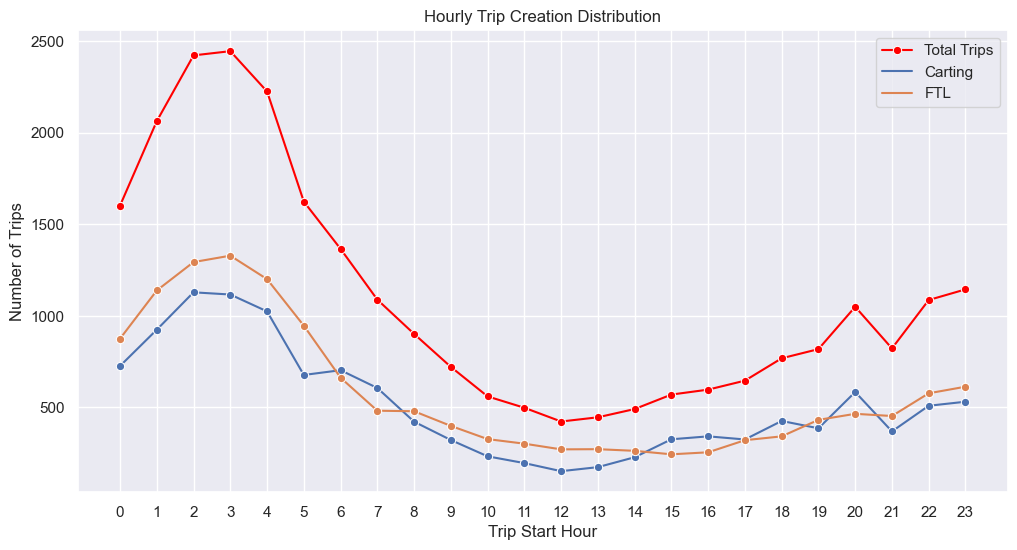

In [45]:
if not pd.api.types.is_datetime64_any_dtype(segment_df['od_start_time']):
    segment_df['od_start_time'] = pd.to_datetime(segment_df['od_start_time'])

segment_df['od_start_time_hour'] = segment_df['od_start_time'].dt.hour

df_hour = segment_df.groupby('od_start_time_hour')['trip_uuid'].count().reset_index()
df_rt_hour = segment_df.groupby(['od_start_time_hour', 'route_type'])['trip_uuid'].count().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_hour, x='od_start_time_hour', y='trip_uuid', marker='o', label='Total Trips', color = 'red')
sns.lineplot(data=df_rt_hour, x='od_start_time_hour', y='trip_uuid', hue='route_type', marker='o')

plt.xticks(np.arange(0, 24))
plt.grid(True)
plt.xlabel('Trip Start Hour')
plt.ylabel('Number of Trips')
plt.title('Hourly Trip Creation Distribution')
plt.legend()
plt.show()

In [46]:
from scipy.stats import chi2_contingency
cross_tab = pd.crosstab(segment_df['source_state'], segment_df['route_type'])
chi2, pval, dof, exp = chi2_contingency(cross_tab)
if pval < 0.05:
    print(f'The pvalue is {pval} and we reject null hypothesis of no association')
else:
    print('Null Hypothesis stands')

The pvalue is 0.0 and we reject null hypothesis of no association


In [47]:
cross_tab

route_type,Carting,FTL
source_state,,
Andhra Pradesh,274,1036
Arunachal Pradesh,41,7
Assam,220,264
Bihar,45,1015
Chandigarh,139,21
Chhattisgarh,31,21
Dadra and Nagar Haveli,15,0
Delhi,640,181
Goa,34,52


In [48]:
if pval < 0.05:
    print(f'The pvalue is {pval} and we reject null hypothesis of no association')
else:
    print('Null Hypothesis stands')

The pvalue is 0.0 and we reject null hypothesis of no association


### Some states are prevalent in choosing specific type of route type

In [49]:
cross_tab = pd.crosstab(segment_df['source_state'], segment_df['destination_state'])
chi2, pval, dof, exp = chi2_contingency(cross_tab)
if pval < 0.05:
    print(f'The pvalue is {pval} and we reject null hypothesis of no association between the categorical variables')
else:
    print('Null Hypothesis stands')

The pvalue is 0.0 and we reject null hypothesis of no association between the categorical variables


#### There's a strong association between the destination and source centers

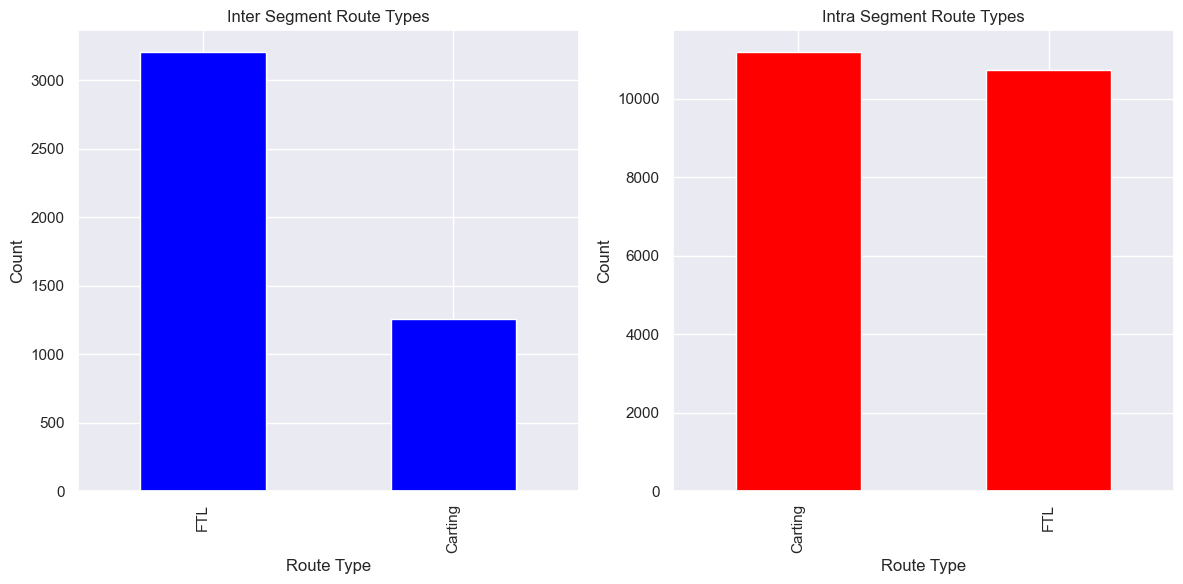

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

inter_segment['route_type'].value_counts().plot(kind='bar', color='blue', ax=axes[0])
axes[0].set_title('Inter Segment Route Types')
axes[0].set_xlabel('Route Type')
axes[0].set_ylabel('Count')

intra_segment['route_type'].value_counts().plot(kind='bar', color='red', ax=axes[1])
axes[1].set_title('Intra Segment Route Types')
axes[1].set_xlabel('Route Type')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [51]:
cross_tab = pd.crosstab(inter_segment['source_state'], inter_segment['destination_state'])
chi2, pval, dof, exp = chi2_contingency(cross_tab)
if pval < 0.05:
    print(f'The pvalue is {pval} and we reject null hypothesis of no association between the categorical variables')
else:
    print('Null Hypothesis stands')

The pvalue is 0.0 and we reject null hypothesis of no association between the categorical variables


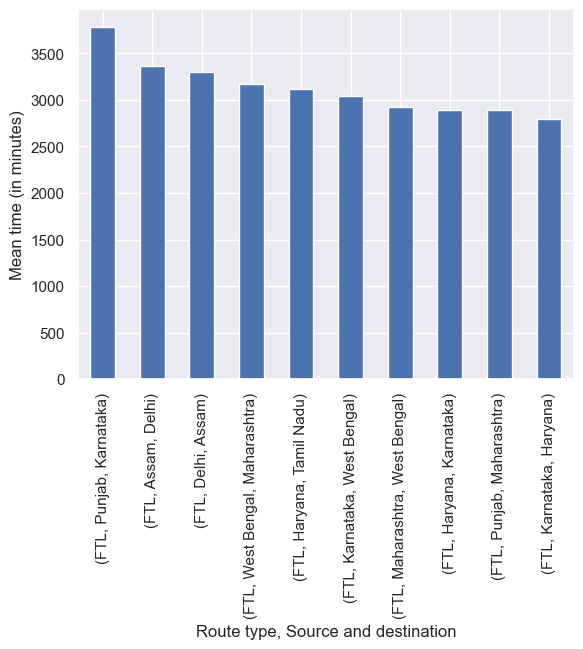

In [52]:
inter_segment.groupby(['route_type', 'source_state', 'destination_state'])['actual_time'].mean().nlargest(10).plot(kind = 'bar')
plt.xlabel('Route type, Source and destination')
plt.ylabel('Mean time (in minutes)')
plt.show()

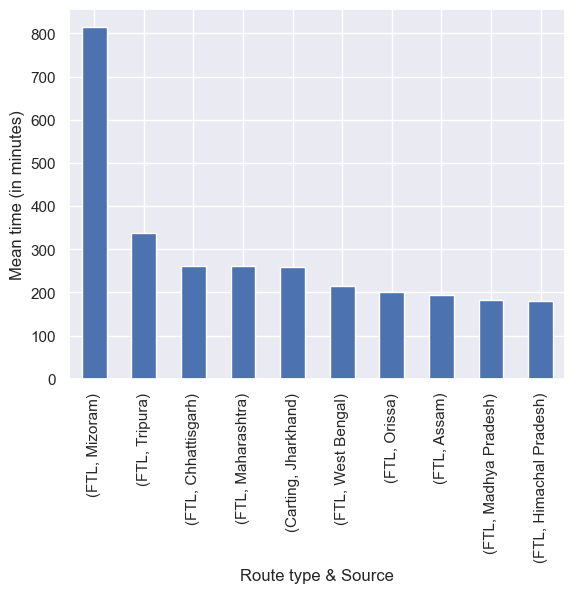

In [53]:
intra_segment.groupby(['route_type', 'source_state'])['actual_time'].mean().nlargest(10).plot(kind = 'bar')
plt.xlabel('Route type & Source')
plt.ylabel('Mean time (in minutes)')
plt.show()

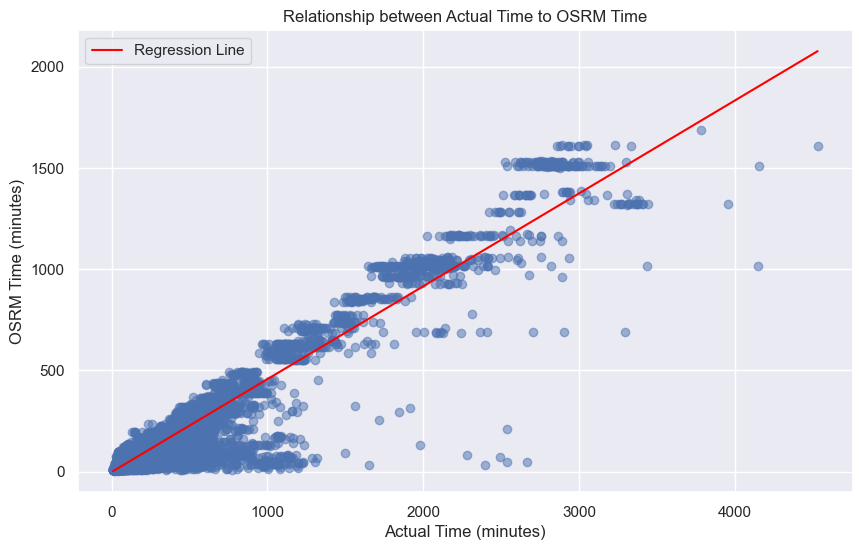

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(segment_df['actual_time'], segment_df['osrm_time'], alpha=0.5)
coefficients = np.polyfit(segment_df['actual_time'], segment_df['osrm_time'], 1)
polynomial = np.poly1d(coefficients)
x_values = np.linspace(segment_df['actual_time'].min(), segment_df['actual_time'].max(), 100)
plt.plot(x_values, polynomial(x_values), color='red', label='Regression Line')
plt.title('Relationship between Actual Time to OSRM Time')
plt.xlabel('Actual Time (minutes)')
plt.ylabel('OSRM Time (minutes)')
plt.grid(True)
plt.legend()
plt.show()

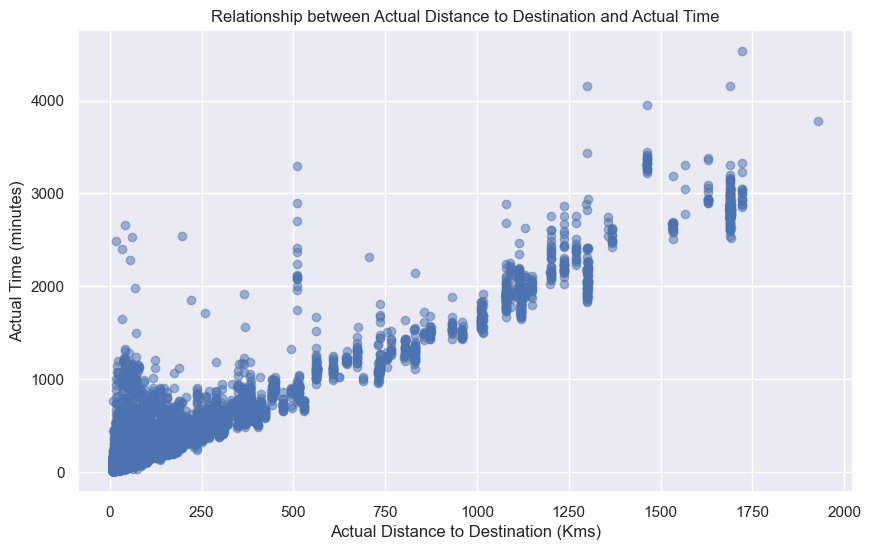

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(segment_df['actual_distance_to_destination'], segment_df['actual_time'], alpha=0.5)
plt.title('Relationship between Actual Distance to Destination and Actual Time')
plt.xlabel('Actual Distance to Destination (Kms)')
plt.ylabel('Actual Time (minutes)')
plt.grid(True)
plt.show()

In [56]:
import statsmodels.api as sm
numerical_columns = ['actual_time', 'osrm_time']
numerical_df = segment_df[numerical_columns].dropna()
X = sm.add_constant(numerical_df['osrm_time'])
y = numerical_df['actual_time']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            actual_time   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.618e+05
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:31:20   Log-Likelihood:            -1.6285e+05
No. Observations:               26368   AIC:                         3.257e+05
Df Residuals:                   26366   BIC:                         3.257e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.9517      0.798     26.243      0.0

**R-squared (0.908): This value indicates a strong positive linear relationship between the estimated travel time (OSRM) and the actual travel time. 90.8% of the variance in actual travel time can be explained by the model based on the estimated travel time.**
**Adjusted R-squared (0.908): Similar to R-squared, but adjusts for the number of predictors. A high value here reinforces the strong relationship.**
**F-statistic: This value and its very low p-value (Prob (F-statistic)) indicate that the model statistically explains the relationship between the variables.**

**Coefficients:**

**Constant (20.95): This represents the expected actual travel time when the estimated travel time (OSRM) is zero. It's likely not meaningful in the context of travel time and might be due to factors not included in the model.**
**osrm_time (1.98): This coefficient is very close to 2, which implies that for every unit increase in estimated travel time, the actual travel time increases by about 1.98 units on average. This is the key finding from the model.**

#### Inference:

**Our model shows a strong positive link between estimated (OSRM) and actual travel time.  There's a significant correlation, meaning as estimated travel time goes up, so does actual travel time, by a factor close to 2. However, the model might have limitations due to potential issues with error distribution and how the variables influence each other.**

In [57]:
numerical_columns = ['actual_distance_to_destination', 'actual_time']
numerical_df = segment_df[numerical_columns].dropna()
X = sm.add_constant(numerical_df['actual_distance_to_destination'])
y = numerical_df['actual_time']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            actual_time   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 2.389e+05
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:31:20   Log-Likelihood:            -1.6394e+05
No. Observations:               26368   AIC:                         3.279e+05
Df Residuals:                   26366   BIC:                         3.279e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**R-squared (0.901): This is very similar to the previous model, indicating another strong positive linear relationship.
Interpretation: Similar to before, a high proportion (around 90%) of the variance in actual travel time can be explained by the model based on actual distance.**

#### Coefficients:

**Constant (39.49): This represents the expected actual travel time when the distance is zero. It likely reflects a base travel time that doesn't depend on distance and might be due to factors not included in the model.**
**Actual distance coefficient (1.74): This coefficient suggests that for every unit increase in actual distance, the actual travel time increases by about 1.74 units on average. This is the key finding from the model.**

#### Inference

**Our model again shows a strong positive link between distance and travel time.  Travel time increases as distance goes up, by a factor around 1.74 on average.  However, there might be limitations due to how the data is distributed and how the variables influence each other.**

In [58]:
from scipy.stats import f_oneway
numerical_columns = ['actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time']
numerical_df = segment_df[numerical_columns]
numerical_df.dropna(inplace=True)
for column in numerical_columns:
    groups = [group[column].dropna() for name, group in segment_df.groupby(['source_state', 'destination_state'])]
    f_statistic, p_value = f_oneway(*groups)
    print(f"ANOVA results for column '{column}':")
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)
    if p_value < 0.05:
        print("The differences between groups are statistically significant.")
    else:
        print("The differences between groups are not statistically significant.")
    print()

ANOVA results for column 'actual_time':
F-statistic: 1013.8952425155899
p-value: 0.0
The differences between groups are statistically significant.

ANOVA results for column 'osrm_time':
F-statistic: 2209.7610038372713
p-value: 0.0
The differences between groups are statistically significant.

ANOVA results for column 'segment_actual_time':
F-statistic: 1002.4503341190346
p-value: 0.0
The differences between groups are statistically significant.

ANOVA results for column 'segment_osrm_time':
F-statistic: 2183.476337442183
p-value: 0.0
The differences between groups are statistically significant.



**In all four cases (actual_time, osrm_time, segment_actual_time, segment_osrm_time), the F-statistic is very high, and the p-value is 0.0 (indicating extremely low probability). This means there's strong evidence to reject the null hypothesis in ANOVA, which assumes there are NO significant differences between groups.**

**In simpler terms, the test found statistically significant differences in travel times (both actual and estimated) between trips with different origin and destination states.**

**Travel times (both actual and estimated) and travel times for segments likely vary depending on the starting and ending locations. There are statistically significant differences in these times based on this analysis.**

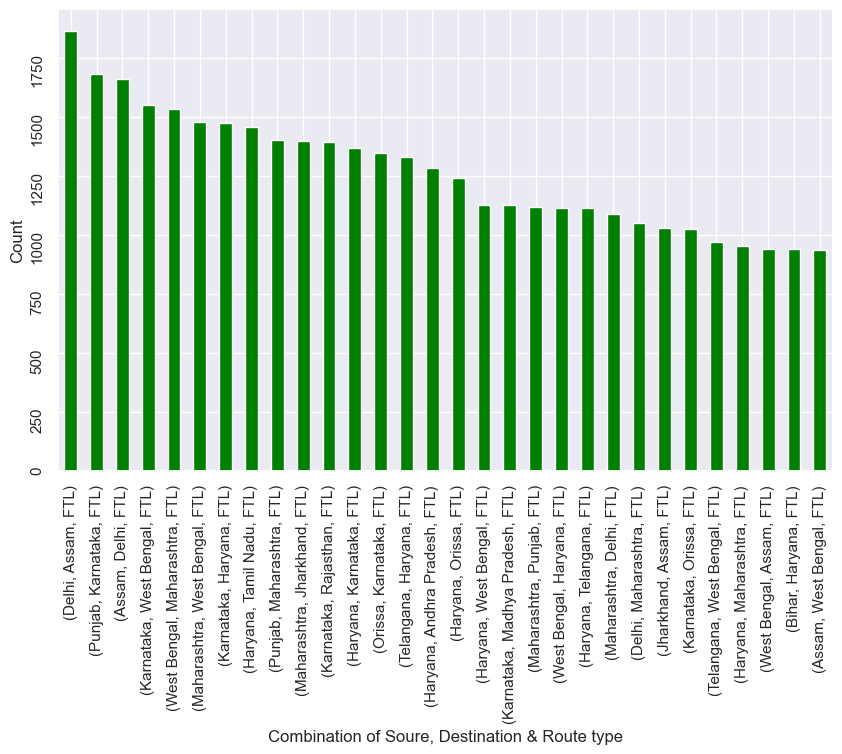

In [59]:
plt.figure(figsize= (10, 6))
transport = df.groupby(['source_state', 'destination_state', 'route_type'])['actual_time'].mean()
transport.nlargest(30).plot(kind = 'bar', color = 'green')
plt.xlabel('Combination of Soure, Destination & Route type')
plt.ylabel('Count')
plt.yticks(rotation = 90)
plt.show()

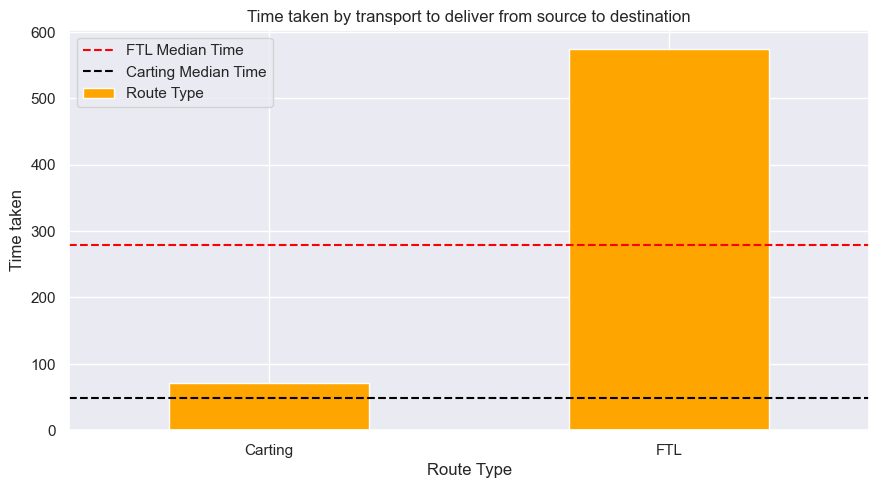

In [60]:
fig = plt.figure(figsize=(8, 4))
ax= fig.add_axes([0,0,1,1])
transport = df.groupby(['route_type'])['actual_time']
transport.mean().plot(kind="bar", color="orange", label = 'Route Type')
ax.set_title("Time taken by transport to deliver from source to destination")
plt.axhline(y=transport.median()['FTL'], linestyle="--",color="red", label = 'FTL Median Time')
plt.axhline(y=transport.median()['Carting'], linestyle="--",color="black", label = 'Carting Median Time')
plt.xlabel("Route Type")
plt.ylabel("Time taken")
plt.xticks(rotation=0)
plt.legend()
plt.show()

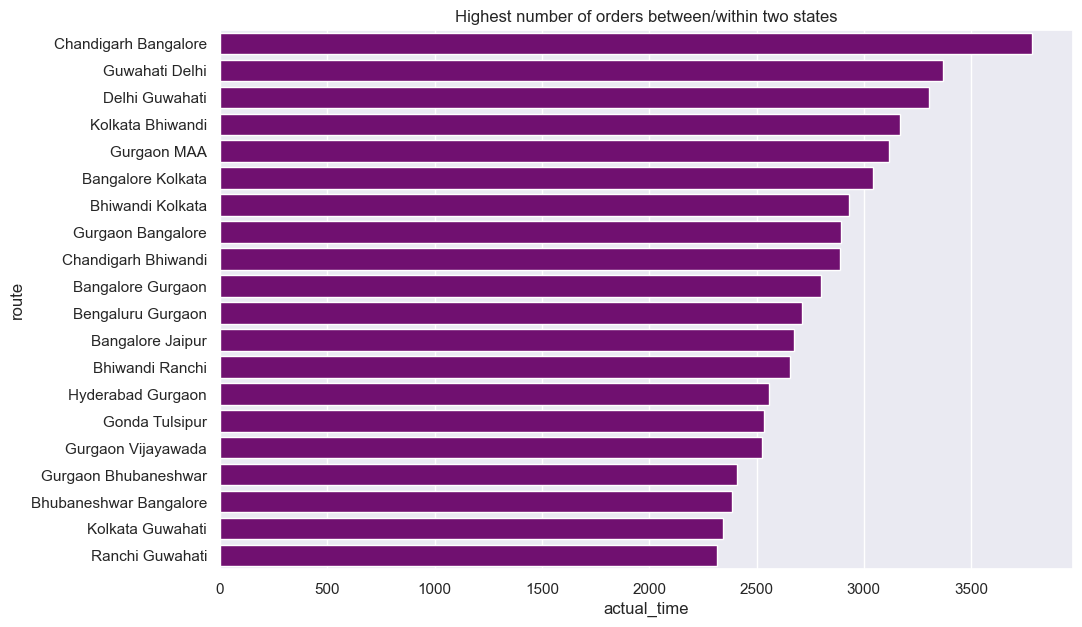

In [61]:
Longest_route_as_per_actual_trip_time = segment_df.groupby(["source_city",
                      "destination_city"])["actual_time"].mean().sort_values(ascending=False).head(20).reset_index()
Longest_route_as_per_actual_trip_time["route"] = Longest_route_as_per_actual_trip_time["source_city"] + " " + Longest_route_as_per_actual_trip_time["destination_city"]
Longest_route_as_per_actual_trip_time.drop(["source_city",
                                            "destination_city"],axis = 1,inplace=True)
Longest_route_as_per_actual_trip_time
plt.figure(figsize=(11,7))
sns.barplot(y = Longest_route_as_per_actual_trip_time["route"],
           x = Longest_route_as_per_actual_trip_time["actual_time"],color= 'purple')
plt.title("Highest number of orders between/within two states")
plt.show()

In [62]:
cross_tab = pd.crosstab(index=[segment_df['source_state'], segment_df['destination_state']],
                        columns=segment_df['weekday'])

In [63]:
cross_tab

weekday                           Friday  Monday  Saturday  Sunday  Thursday  \
source_state   destination_state                                               
Andhra Pradesh Andhra Pradesh        151     142       173     148       180   
               Karnataka               5       9         7       4         7   
               Orissa                  3       2         4       4         2   
               Tamil Nadu              1       2         1       2         2   
               Telangana              13      12        14      13        14   
...                                  ...     ...       ...     ...       ...   
West Bengal    Haryana                 2       1         1       1         1   
               Jharkhand               3       3         4       3         4   
               Maharashtra             0       1         1       1         1   
               Orissa                  3       3         4       4         5   
               West Bengal           170     136       191     181       214   

weekday                           Tuesday  Wednesday  
source_state   destination_state                      
Andhra Pradesh Andhra Pradesh         169        176  
               Karnataka                8          9  
               Orissa                   2          2  
               Tamil Nadu               2          1  
               Telangana               11         15  
...                                   ...        ...  
West Bengal    Haryana                  1          4  
               Jharkhand                2          1  
               Maharashtra              0          1  
               Orissa                   5          3  
               West Bengal            196        208  

[155 rows x 7 columns]

In [64]:
chi2, pval, dof, exp = chi2_contingency(cross_tab)
if pval < 0.05:
    print(f'The pvalue is {pval} and we reject null hypothesis of no association between the categorical variables')
else:
    print('Null Hypothesis stands')

Null Hypothesis stands


In [65]:
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_id                      26368 non-null  object        
 1   trip_creation_time              26368 non-null  datetime64[ns]
 2   route_schedule_uuid             26368 non-null  object        
 3   route_type                      26368 non-null  object        
 4   trip_uuid                       26368 non-null  object        
 5   source_center                   26368 non-null  object        
 6   source_name                     26302 non-null  object        
 7   destination_center              26368 non-null  object        
 8   destination_name                26287 non-null  object        
 9   od_start_time                   26368 non-null  datetime64[ns]
 10  od_end_time                     26368 non-null  datetime64[ns]
 11  st

In [66]:
source_name_mapping = {}
for index,row in segment_df.iterrows():
    if pd.notna(row['source_name']):
        source_center = row['source_center']
        source_name = row['source_name']
        source_name_mapping[source_center] = source_name

segment_df['source_name'] = segment_df['source_name'].fillna(lambda x: source_name_mapping.get(x, x))

In [67]:
destination_name_mapping = {}
for index,row in segment_df.iterrows():
    if pd.notna(row['destination_name']):
        destination_center = row['destination_center']
        destination_name = row['destination_name']
        destination_name_mapping[destination_center] = destination_name

segment_df['destination_name'] = segment_df['destination_name'].fillna(lambda x: destination_name_mapping.get(x, x))

In [68]:
source_city_mapping = {}
for index,row in segment_df.iterrows():
    if pd.notna(row['source_city']):
        source_center = row['source_center']
        source_city = row['source_city']
        source_city_mapping[source_center] = source_city

segment_df['source_city'] = segment_df['source_city'].fillna(lambda x: source_city_mapping.get(x, x))

In [69]:
source_state_mapping = {}
for index,row in segment_df.iterrows():
    if pd.notna(row['source_state']):
        source_center = row['source_center']
        source_state = row['source_state']
        source_state_mapping[source_center] = source_state

segment_df['source_state'] = segment_df['source_state'].fillna(lambda x: source_state_mapping.get(x, x))

In [70]:
destination_city_mapping = {}
for index,row in segment_df.iterrows():
    if pd.notna(row['destination_city']):
        destination_center = row['destination_center']
        destination_city = row['destination_city']
        destination_city_mapping[destination_center] = destination_city

segment_df['destination_city'] = segment_df['destination_city'].fillna(lambda x: destination_city_mapping.get(x, x))

In [71]:
destination_state_mapping = {}
for index,row in segment_df.iterrows():
    if pd.notna(row['destination_state']):
        destination_center = row['destination_center']
        destination_state = row['destination_state']
        destination_state_mapping[destination_center] = destination_state

segment_df['destination_state'] = segment_df['destination_state'].fillna(lambda x: destination_state_mapping.get(x, x))

In [72]:
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_id                      26368 non-null  object        
 1   trip_creation_time              26368 non-null  datetime64[ns]
 2   route_schedule_uuid             26368 non-null  object        
 3   route_type                      26368 non-null  object        
 4   trip_uuid                       26368 non-null  object        
 5   source_center                   26368 non-null  object        
 6   source_name                     26368 non-null  object        
 7   destination_center              26368 non-null  object        
 8   destination_name                26368 non-null  object        
 9   od_start_time                   26368 non-null  datetime64[ns]
 10  od_end_time                     26368 non-null  datetime64[ns]
 11  st

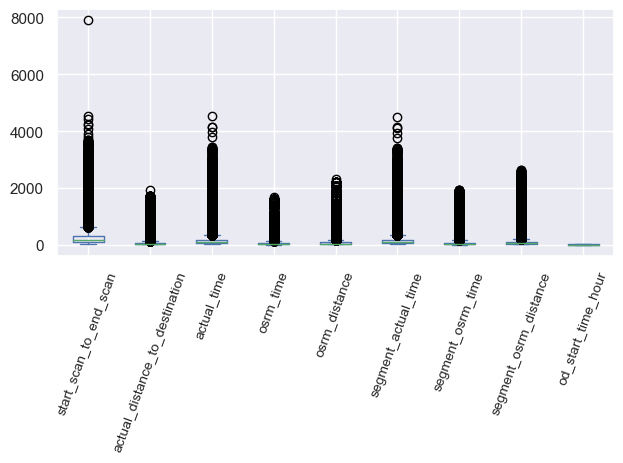

In [73]:
box_data = segment_df.select_dtypes(include=np.number)
box_data.plot(kind='box')
plt.xticks(rotation=70, fontsize=10)
plt.tight_layout()
plt.show()

In [74]:
segment_df['trip_prep'] = (segment_df['od_start_time'] - segment_df['trip_creation_time']).dt.total_seconds() / 60

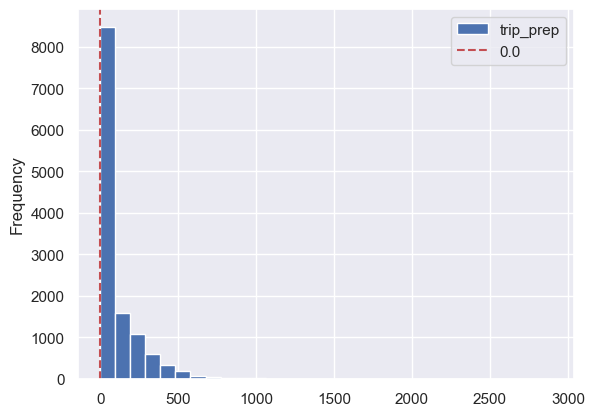

In [75]:
cart_prep = segment_df.loc[segment_df['route_type'] == 'Carting', 'trip_prep']
cart_prep.plot(kind  = 'hist', bins = 30)
plt.axvline(x = cart_prep.median(),linestyle = '--', color = 'r', label = cart_prep.median())
plt.legend()
plt.show()

In [76]:
segment_df.loc[segment_df['route_type'] == 'FTL', 'trip_prep'].quantile(0.5)

265.1785625666667

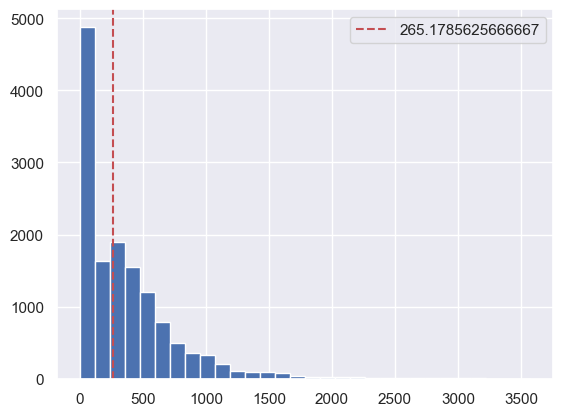

In [77]:
ftl_prep = segment_df.loc[segment_df['route_type'] == 'FTL', 'trip_prep']
ftl_prep.hist(bins = 30)
plt.axvline(x = ftl_prep.median(), linestyle = '--', color = 'r', label = ftl_prep.median() )
plt.legend()
plt.show()

In [78]:
segment_df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_start_time_hour,trip_prep
count,26368,26368,26368,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000
mean,2018-09-22 14:43:36.654209792,2018-09-22 18:35:37.295263232,2018-09-22 23:34:22.949020928,298.262060,92.425217,200.690193,90.686704,114.827642,198.863092,101.681318,125.423680,8.968143,232.010684
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.001351,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,0.000000,0.000000
25%,2018-09-17 04:43:09.467353088,2018-09-17 08:36:26.495753472,2018-09-17 16:27:20.898079744,91.000000,21.684419,51.000000,25.000000,27.764725,50.000000,25.000000,28.471300,3.000000,0.000000
50%,2018-09-22 04:42:33.886023424,2018-09-22 08:33:44.414494720,2018-09-22 16:37:58.917223936,152.000000,35.114228,84.000000,39.000000,43.633050,83.000000,42.000000,45.944400,6.000000,96.874975
75%,2018-09-27 20:22:47.618743808,2018-09-28 00:13:59.749550848,2018-09-28 03:42:07.161700864,307.000000,65.750726,168.000000,72.000000,85.566975,166.000000,79.000000,91.351975,16.000000,344.787210
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,4504.000000,1938.000000,2640.924700,23.000000,3575.014669
std,NaN,NaN,NaN,440.556923,209.415035,384.853640,185.080423,253.773765,381.283224,215.650948,285.932556,7.495315,355.812323


In [79]:
segment = segment_df

In [230]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def clean_column(column):
    return column.apply(lambda x: str(x) if not isinstance(x, str) else x)

def data_encoding(encode_data_df):
    oe = OneHotEncoder(drop='first', sparse_output = False)
    encoded_data = oe.fit_transform(encode_data_df[['route_type']])
    feature_name = oe.get_feature_names_out(['route_type'])[0] 
    encoded_df = pd.DataFrame(encoded_data, columns=[feature_name])

    encode_data = pd.concat([encode_data_df.drop('route_type', axis=1).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
    cat_cols = encode_data.select_dtypes(include=["object"]).columns.tolist()
    
    exclude_columns = ['segment_id', 'route_schedule_uuid', 'trip_uuid', feature_name]
    categorical_columns = [col for col in cat_cols if col not in exclude_columns]

    for col in categorical_columns:
        encode_data[col] = clean_column(encode_data[col])
    
    encoder ={}
    for col in categorical_columns:
        le = LabelEncoder()
        encode_data[col] = le.fit_transform(encode_data[col])
        encoder[col] = le
    return encode_data, encoder

segment_encoded,encoder = data_encoding(segment)

In [225]:
segment_encoded

,segment_id,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_city,source_state,destination_city,destination_state,weekday,od_start_time_hour,trip_prep,route_type_FTL
0,trip-153671041653548748IND209304AAAIND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,206,724,6,521,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,559,29,413,12,6,16,999.505379,1.0
1,trip-153671041653548748IND462022AAAIND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,676,213,200,700,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,174,17,554,30,6,0,0.000000,1.0
2,trip-153671042288605164IND561203AABIND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,914,437,906,310,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,334,15,242,16,6,2,122.779486,0.0
3,trip-153671042288605164IND572101AAAIND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,945,1435,904,421,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,1188,15,328,16,6,0,0.000000,0.0
4,trip-153671043369099517IND000000ACBIND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,8,540,135,274,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,421,11,229,25,0,3,3099.723591,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069IND628204AAAIND627657AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,1109,1415,1091,1386,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,1171,26,1165,27,4,2,149.831354,0.0
26364,trip-153861115439069069IND628613AAAIND627005AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,1110,1136,1088,1399,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,915,26,1177,27,4,4,257.425065,0.0
26365,trip-153861115439069069IND628801AAAIND628204AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,1111,451,1094,1393,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,348,26,1172,27,4,1,105.656951,0.0
26366,trip-153861118270144424IND583119AAAIND583101AAA,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,trip-153861118270144424,993,1269,981,152,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303,1037,15,138,16,4,3,238.967081,1.0


In [226]:
segment_encoded.drop(['start_scan_to_end_scan', 'segment_actual_time',
                      'segment_osrm_time', 'segment_osrm_distance', 'trip_prep'],
                    axis = 1, inplace = True)

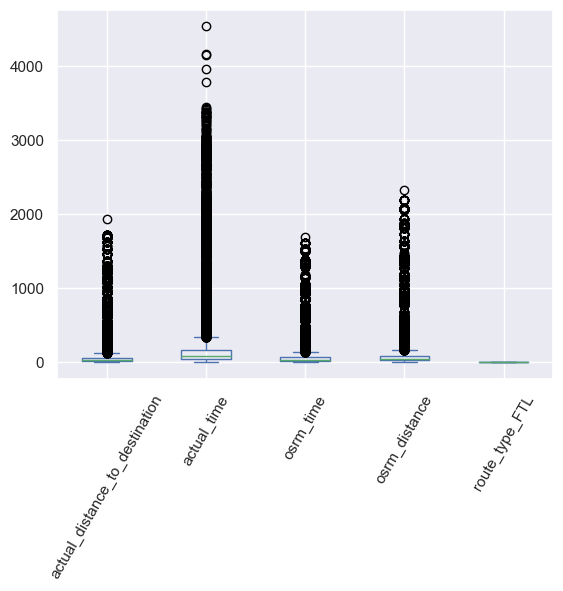

In [83]:
cols = segment_encoded.select_dtypes(include = 'float64').columns
segment_encoded[cols].plot(kind = 'box')
plt.xticks(rotation = 60)
plt.show()

In [84]:
cols

Index(['actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'route_type_FTL'],
      dtype='object')

In [85]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler()
mm = MinMaxScaler(feature_range = (0,1))

In [86]:
sc_segment = segment_encoded.copy()

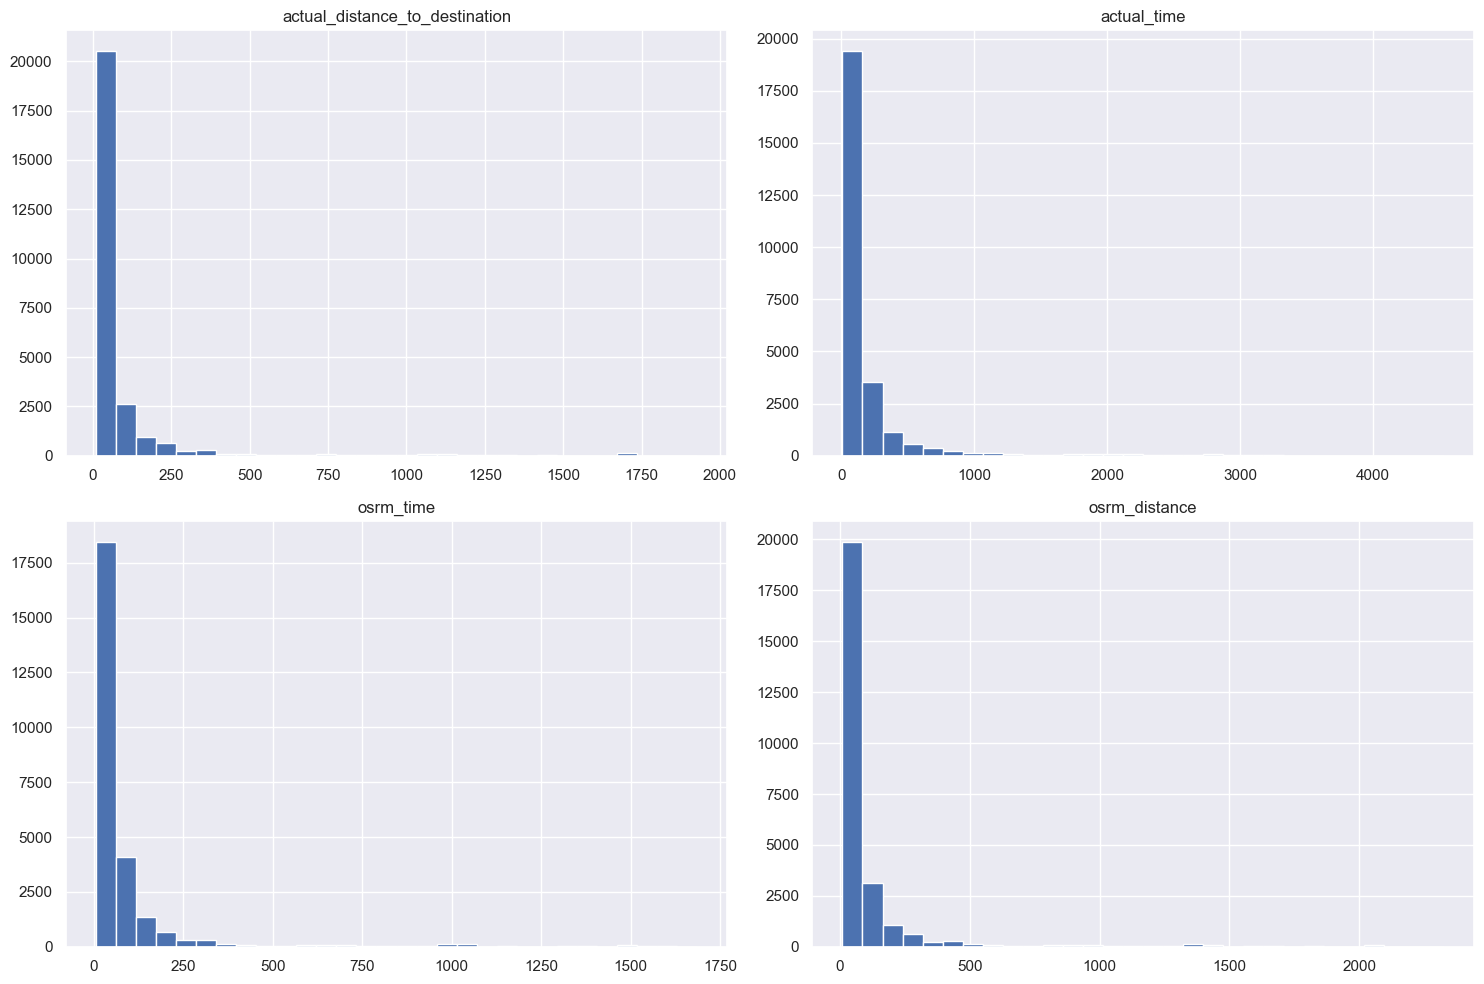

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(cols):
    if col != 'route_type_FTL':
        sc_segment[col].hist(ax=axes[i], bins=30)
        axes[i].set_title(col)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [88]:
cols_to_scale = [col for col in cols if col != 'actual_time']
sc_segment[cols_to_scale] = sc.fit_transform(sc_segment[cols_to_scale])

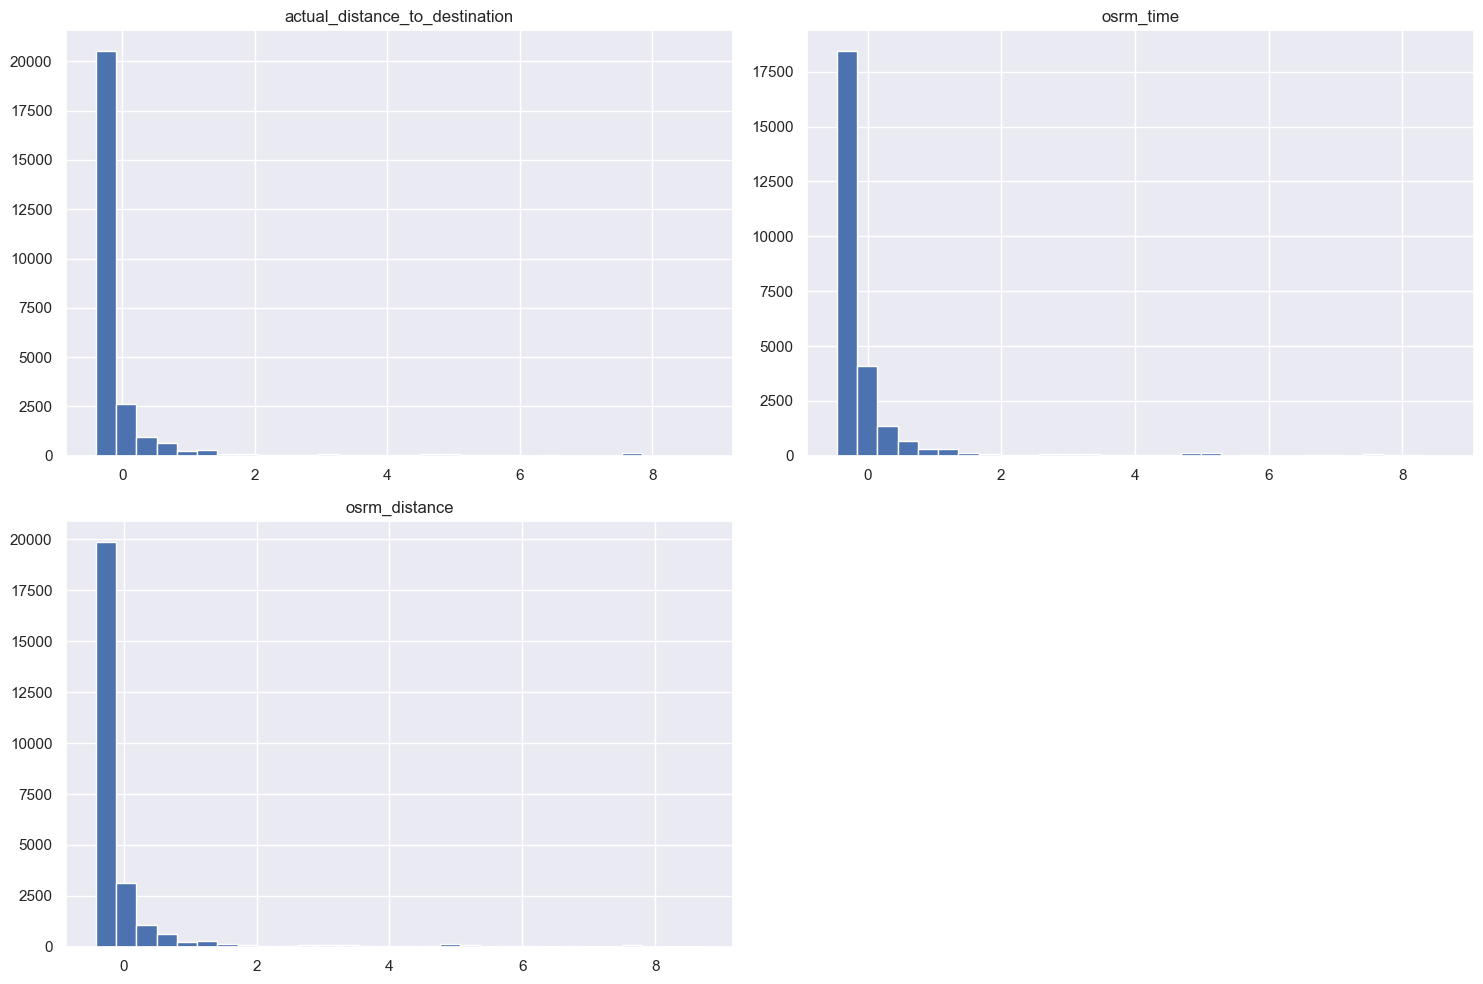

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
plot_count = 0
for i, col in enumerate(cols):
    if col != 'route_type_FTL' and col != 'actual_time':
        sc_segment[col].hist(ax=axes[plot_count], bins=30)
        axes[plot_count].set_title(col)
        plot_count+= 1
for j in range(plot_count, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [90]:
mm_segment = segment_encoded.copy()

In [91]:
mm_segment[cols_to_scale] = mm.fit_transform(mm_segment[cols_to_scale])

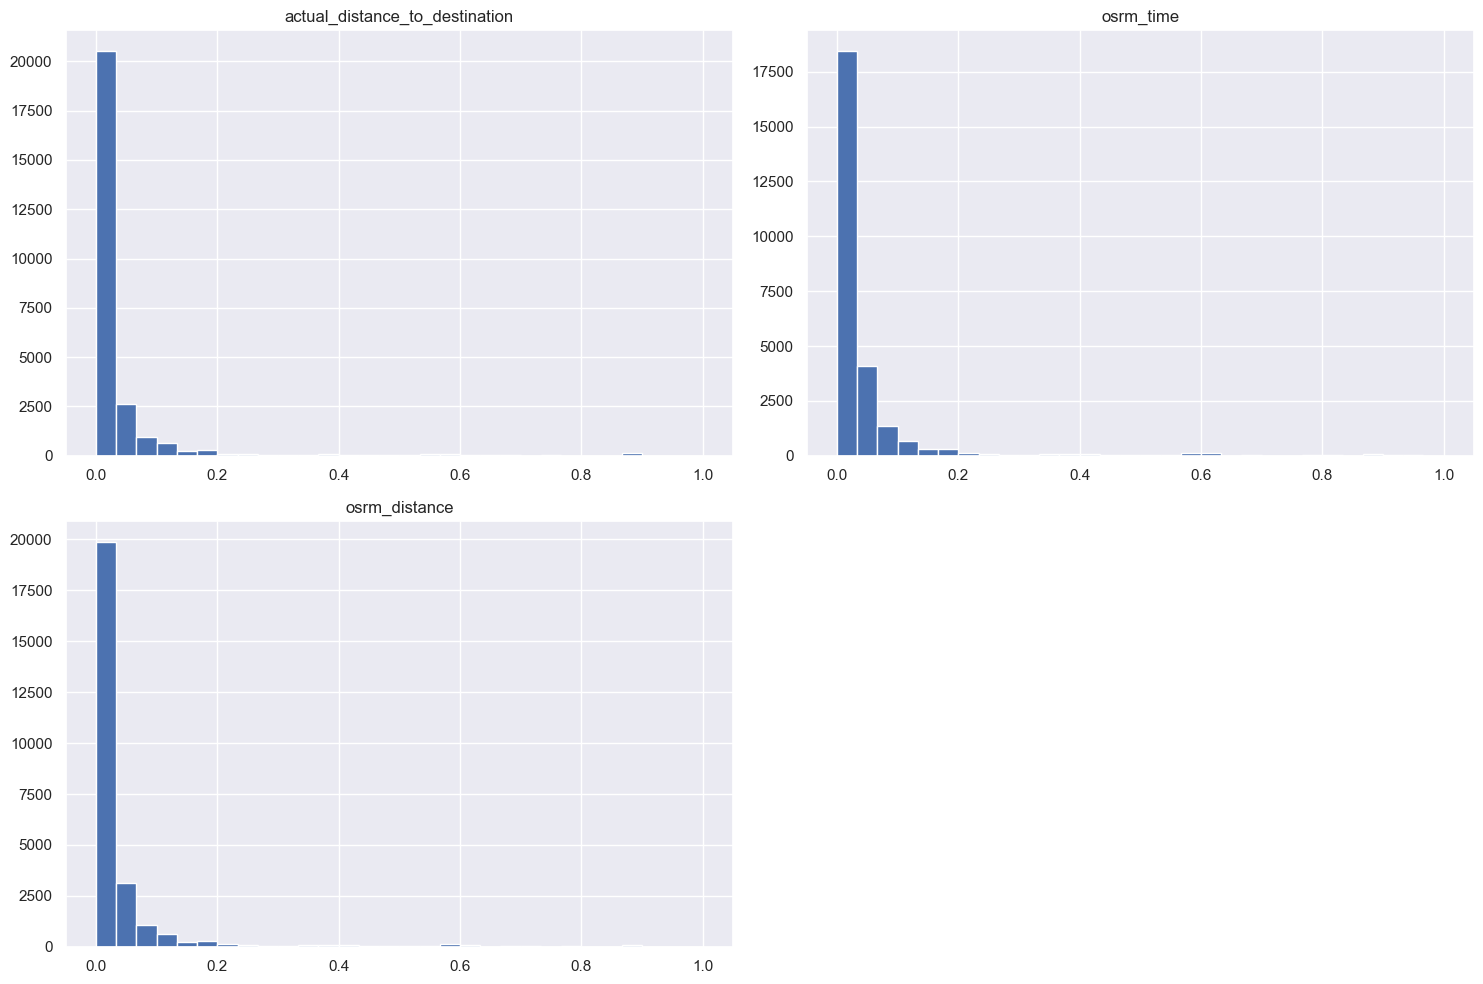

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
plot_count = 0
for i, col in enumerate(cols):
    if col != 'route_type_FTL' and col != 'actual_time':
        mm_segment[col].hist(ax=axes[plot_count], bins=30)
        axes[plot_count].set_title(col)
        plot_count+= 1
for j in range(plot_count, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [93]:
trial = segment_encoded.copy()
trial

,segment_id,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,source_city,source_state,destination_city,destination_state,weekday,od_start_time_hour,route_type_FTL
0,trip-153671041653548748IND209304AAAIND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,206,724,6,521,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,383.759164,732.0,329.0,446.5496,559,29,413,12,6,16,1.0
1,trip-153671041653548748IND462022AAAIND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,676,213,200,700,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,440.973689,830.0,388.0,544.8027,174,17,554,30,6,0,1.0
2,trip-153671042288605164IND561203AABIND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,914,437,906,310,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,24.644021,47.0,26.0,28.1994,334,15,242,16,6,2,0.0
3,trip-153671042288605164IND572101AAAIND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,945,1435,904,421,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,48.542890,96.0,42.0,56.9116,1188,15,328,16,6,0,0.0
4,trip-153671043369099517IND000000ACBIND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,8,540,135,274,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,237.439610,611.0,212.0,281.2109,421,11,229,25,0,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069IND628204AAAIND627657AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,1109,1415,1091,1386,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,33.627182,51.0,41.0,42.5213,1171,26,1165,27,4,2,0.0
26364,trip-153861115439069069IND628613AAAIND627005AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,1110,1136,1088,1399,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,33.673835,90.0,48.0,40.6080,915,26,1177,27,4,4,0.0
26365,trip-153861115439069069IND628801AAAIND628204AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,1111,451,1094,1393,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,12.661945,30.0,14.0,16.0185,348,26,1172,27,4,1,0.0
26366,trip-153861118270144424IND583119AAAIND583101AAA,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,trip-153861118270144424,993,1269,981,152,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,40.546740,233.0,42.0,52.5303,1037,15,138,16,4,3,1.0


In [94]:
trial_num_cols = trial.select_dtypes(include = 'float64').columns
trial_num_cols

Index(['actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'route_type_FTL'],
      dtype='object')

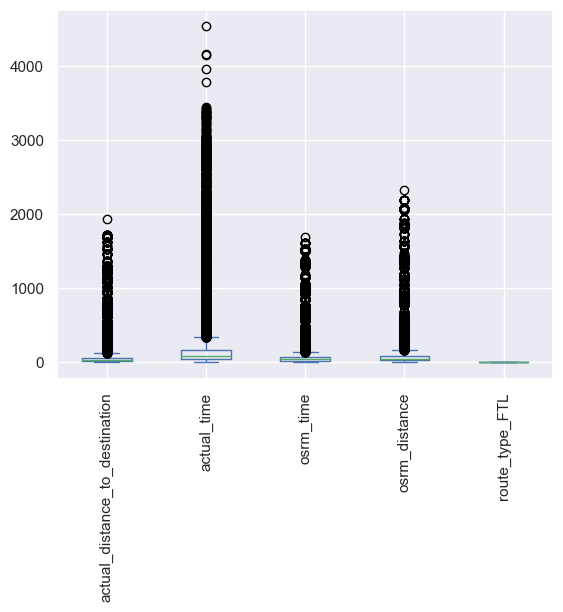

In [95]:
trial[trial_num_cols].plot(kind = 'box')
plt.xticks(rotation = 90)
plt.show()

In [96]:
for col in trial_num_cols:
    if col != 'route_type_FTL' and col != 'actual_time':
        trial[col] = sc.fit_transform(trial[[col]])

In [97]:
trial

,segment_id,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,source_city,source_state,destination_city,destination_state,weekday,od_start_time_hour,route_type_FTL
0,trip-153671041653548748IND209304AAAIND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,206,724,6,521,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1.391206,732.0,1.287645,1.307181,559,29,413,12,6,16,1.0
1,trip-153671041653548748IND462022AAAIND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,676,213,200,700,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,1.664422,830.0,1.606431,1.694356,174,17,554,30,6,0,1.0
2,trip-153671042288605164IND561203AABIND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,914,437,906,310,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,-0.323675,47.0,-0.349513,-0.341367,334,15,242,16,6,2,0.0
3,trip-153671042288605164IND572101AAAIND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,945,1435,904,421,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,-0.209551,96.0,-0.263062,-0.228224,1188,15,328,16,6,0,0.0
4,trip-153671043369099517IND000000ACBIND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,8,540,135,274,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,0.692487,611.0,0.655475,0.655649,421,11,229,25,0,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069IND628204AAAIND627657AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,1109,1415,1091,1386,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,-0.280778,51.0,-0.268465,-0.284930,1171,26,1165,27,4,2,0.0
26364,trip-153861115439069069IND628613AAAIND627005AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,1110,1136,1088,1399,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,-0.280555,90.0,-0.230643,-0.292469,915,26,1177,27,4,4,0.0
26365,trip-153861115439069069IND628801AAAIND628204AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,1111,451,1094,1393,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,-0.380893,30.0,-0.414350,-0.389367,348,26,1172,27,4,1,0.0
26366,trip-153861118270144424IND583119AAAIND583101AAA,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,trip-153861118270144424,993,1269,981,152,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,-0.247735,233.0,-0.263062,-0.245488,1037,15,138,16,4,3,1.0


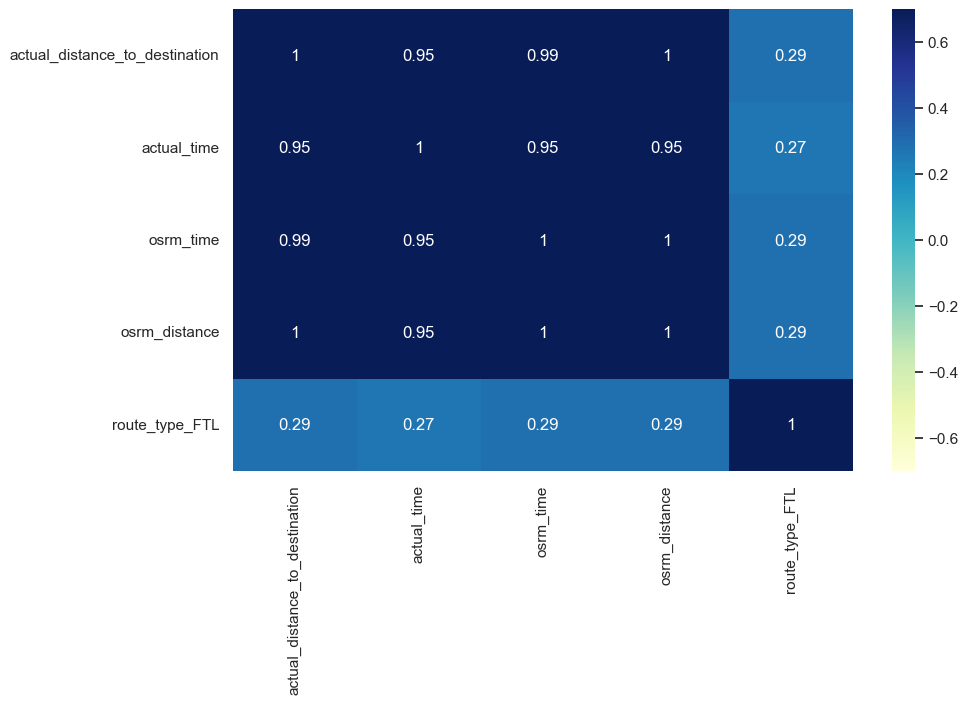

In [98]:
corr = segment_encoded.select_dtypes(include = ['float64']).corr()
mask = (corr <= 0.2) & (corr >= -0.2)
plt.subplots(figsize = (10,6))
sns.heatmap(corr.mask(mask), vmin=-0.7, vmax=0.7, cmap='YlGnBu', annot = True, mask = mask)
plt.show()

In [99]:
x_trial = trial.iloc[:, [4,5,6,7,10,15,17,19,20]]
y_trial = trial['actual_time']

In [100]:
from sklearn.decomposition import PCA

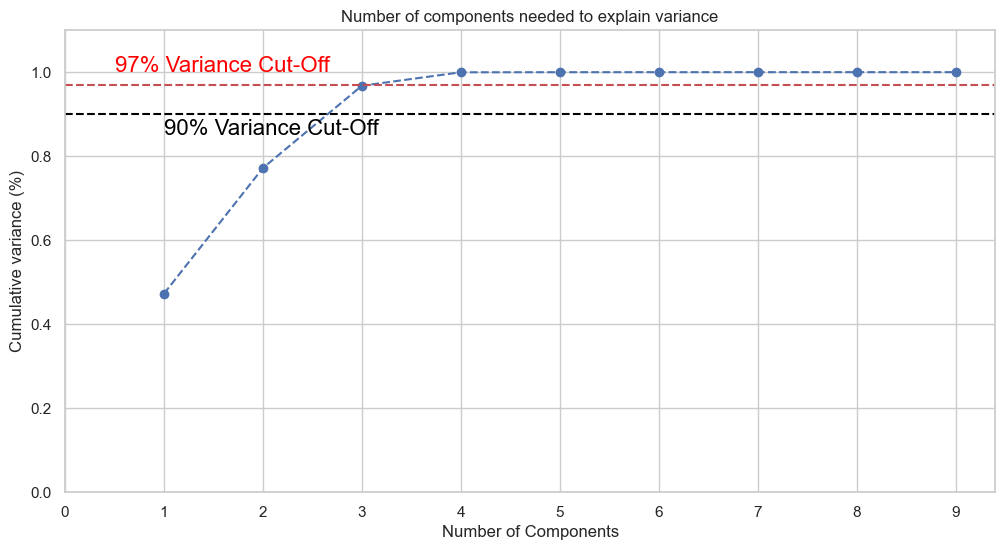

In [101]:
pca = PCA().fit(x_trial)

sns.set(style = 'whitegrid')
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 10, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Number of components needed to explain variance')

plt.axhline(y=0.97, color='r', linestyle='--')
plt.axhline(y=0.9, color='black', linestyle='--')
plt.text(0.5, 1, '97% Variance Cut-Off', color = 'red', fontsize=16)
plt.text(1, 0.85, '90% Variance Cut-Off', color = 'black', fontsize=16)
plt.show()

In [102]:
pca = PCA(n_components = 4)
x_pca = pca.fit_transform(x_trial)

In [103]:
from sklearn.model_selection import train_test_split 

y = y_trial
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size= 0.33, random_state=42)

In [104]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [107]:
from sklearn.metrics import mean_squared_error

regressors = {
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBRegressor': XGBRegressor(),
    'KNearestRegressor': KNeighborsRegressor()
}

In [108]:
results = {}

for name, regressor in regressors.items():
    regressor.fit(x_train, y_train)
    predictions = regressor.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    results[name] = mse

for name, mse in results.items():
    print(f'{name}: Mean Squared Error = {mse}')

Ridge Regression: Mean Squared Error = 155805.77554370902
Decision Tree: Mean Squared Error = 15394.880785648318
Random Forest: Mean Squared Error = 11810.791412245217
Gradient Boosting: Mean Squared Error = 35335.225318566096
XGBRegressor: Mean Squared Error = 11551.566108562181
KNearestRegressor: Mean Squared Error = 14289.54580556194


In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [110]:
param_grid = {
    'n_neighbors': [3,19,25],
    'weights': ['distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20],
    'p': [1, 2]
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
best_knnparams = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_knnparams}")
print(f"Best cross-validation R² score: {best_score:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 19, 'p': 2, 'weights': 'distance'}
Best cross-validation R² score: 0.9328


In [111]:
param_grid = {
  'n_estimators': [50, 100],
  'max_depth': [5, 10],
  'learning_rate': [0.01, 0.1],
  'subsample': np.linspace(0.6, 0.8, 4)
}

xgbr = XGBRegressor() 
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=5, scoring="r2", n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

best_xgparams = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_xgparams}")
print(f"Best cross-validation R² score: {best_score:.4f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation R² score: 0.9383


In [112]:
param_grid = {
  'n_estimators': [300],
  'max_depth': [5,15],
  'min_samples_split': [2,10],
  'min_samples_leaf': [1,2],
  'max_features': ['log2', None],
  'bootstrap': [True, False]
}

random = RandomForestRegressor()
grid_search = GridSearchCV(random, param_grid=param_grid, cv=5, scoring="r2", n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

best_rfparams = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_rfparams}")
print(f"Best cross-validation R² score: {best_score:.4f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation R² score: 0.9367


In [113]:
knn = KNeighborsRegressor(**best_knnparams)
knn.fit(x_train, y_train)

KNeighborsRegressor(leaf_size=10, n_neighbors=19, weights='distance')

In [114]:
xgbr = XGBRegressor(**best_xgparams)
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [115]:
random = RandomForestRegressor(**best_rfparams)
random.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=15, max_features='log2',
                      min_samples_split=10, n_estimators=300)

In [116]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
skf = StratifiedKFold(n_splits=5)

Mean R² score from cross-validation: 0.9356450704904746
Standard Deviation of R² scores: 0.008165001105294455


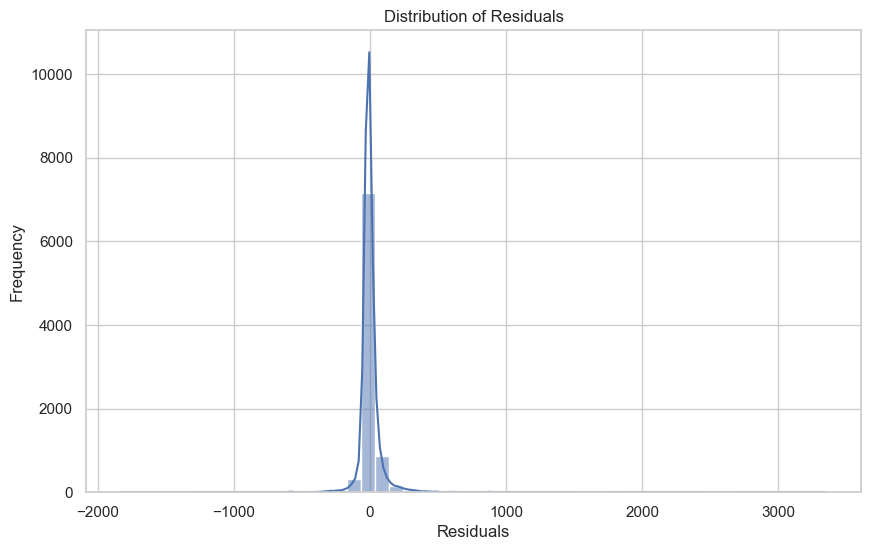

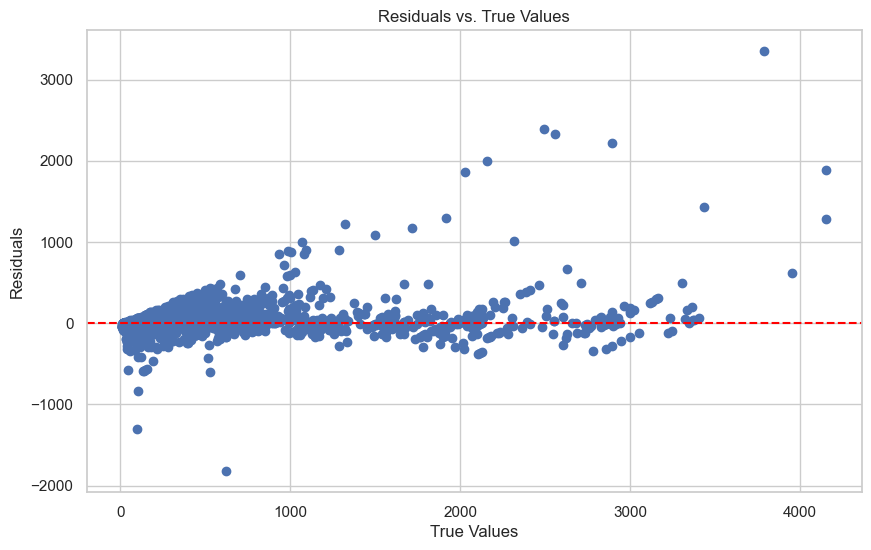

Mean Squared Error: 11276.47396627391
Mean Absolute Error: 40.15976783616108


In [117]:
cv_scores = cross_val_score(xgbr, x_pca, y, cv=skf, scoring='r2')
print(f'Mean R² score from cross-validation: {cv_scores.mean()}')
print(f'Standard Deviation of R² scores: {cv_scores.std()}')

xgbr.fit(x_train, y_train)
y_pred = xgbr.predict(x_test)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean R² score from cross-validation: 0.9349502220620023
Standard Deviation of R² scores: 0.005206583167212012


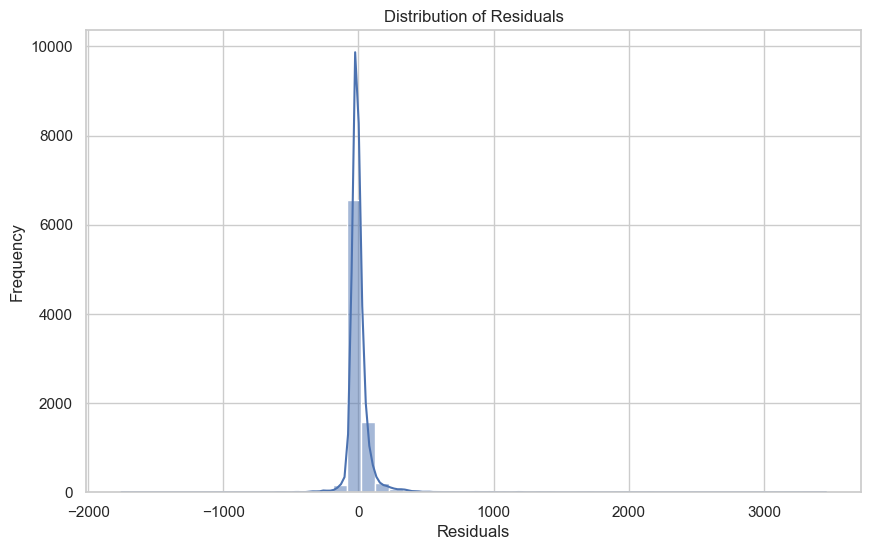

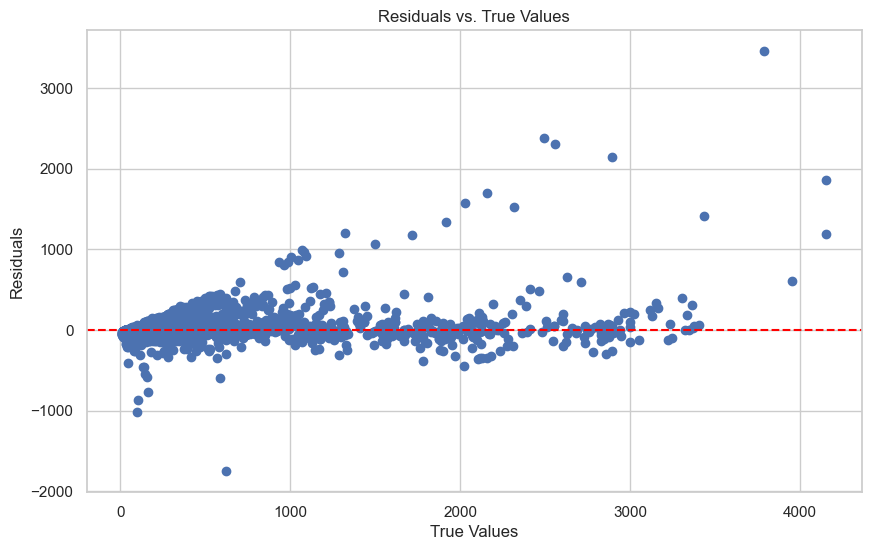

Mean Squared Error: 11600.02851904943
Mean Absolute Error: 43.82863709668365


In [118]:
cv_scores = cross_val_score(random, x_pca, y, cv=skf, scoring='r2')
print(f'Mean R² score from cross-validation: {cv_scores.mean()}')
print(f'Standard Deviation of R² scores: {cv_scores.std()}')

random.fit(x_train, y_train)
y_pred = random.predict(x_test)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean R² score from cross-validation: 0.9332458660224855
Standard Deviation of R² scores: 0.006048675092375435


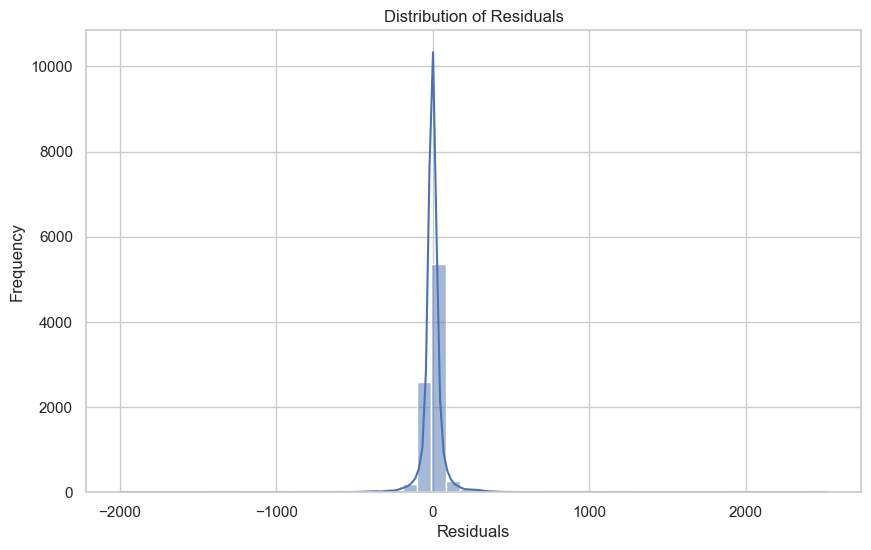

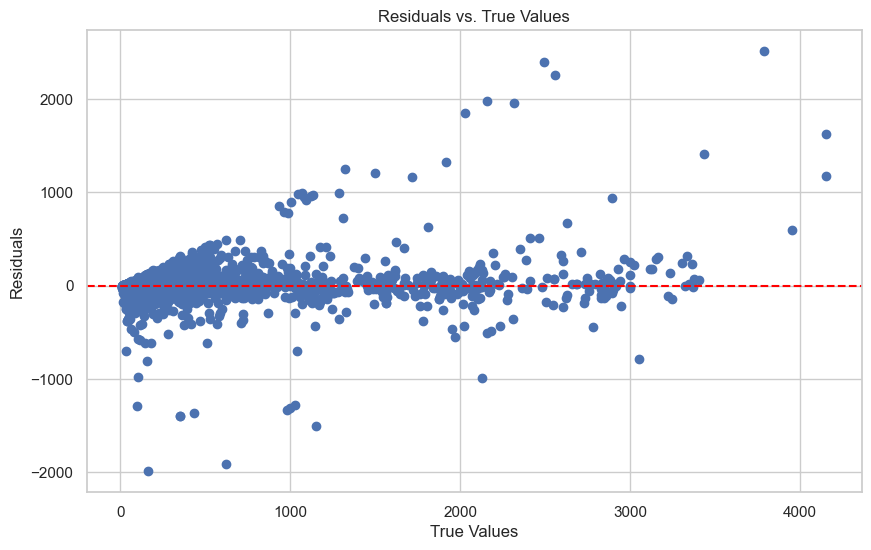

Mean Squared Error: 13177.869294982833
Mean Absolute Error: 37.450923822080156


In [119]:
cv_scores = cross_val_score(knn, x_pca, y_trial, cv=skf, scoring='r2')
print(f'Mean R² score from cross-validation: {cv_scores.mean()}')
print(f'Standard Deviation of R² scores: {cv_scores.std()}')


y_pred = knn.predict(x_test)
residuals = y_test - y_pred #+ Actual Value is big , Pred val is small

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

In [181]:
y_total = xgbr.predict(x_pca)
xgb_success = (((y_trial - y_total) < 20) & ((y_trial - y_total) > -20) ).sum()/ len(x_pca)
print(f'R² Score: {r2_score(y_trial, y_total)}, \n% of trips with threshold delay: {xgb_success*100:.2f}')

R² Score: 0.9550501421901127, 
% of trips with threshold delay: 52.18


In [180]:
y_total = knn.predict(x_pca)
knn_success = (((y_trial - y_total) < 20) & ((y_trial - y_total) > -20)).sum()/ len(x_pca)
print(f'R² Score: {r2_score(y_trial, y_total)}, \n% of trips with threshold delay: {knn_success*100:.2f}')

R² Score: 0.9706361930397407, 
% of trips with threshold delay: 87.83


In [179]:
y_total = random.predict(x_pca)
random_success = (((y_trial - y_total) < 20) & ((y_trial - y_total) > -20)).sum()/ len(x_pca)
print(f'R² Score: {r2_score(y_trial, y_total)}, \n% of trips with threshold delay: {random_success*100:.2f}')

R² Score: 0.9555738006181838, 
% of trips with threshold delay: 41.61


In [211]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(knn,file)

In [212]:
scaler = sc.fit(segment_encoded[['actual_distance_to_destination']])

In [213]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler,file)

In [234]:
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)